In [5]:
# library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
pip install imbalanced-learn



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 235.6/235.6 kB 1.2 MB/s eta 0:00:00


In [6]:
data = pd.read_csv('TelecomCustomerChurn.csv')

display(data.head())
print(data.shape)

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

(4250, 20)


In [8]:
display(data.describe())
display(data.describe(include = 'object'))

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

state      area_code international_plan voice_mail_plan churn
count   4250           4250               4250            4250  4250
unique    51              3                  2               2     2
top       WV  area_code_415                 no              no    no
freq     139           2108               3854            3138  3652

In [9]:
cate_df = [col for col in data.columns if data[col].dtypes == 'O']


In [10]:
data[cate_df]

state      area_code international_plan voice_mail_plan churn
0       OH  area_code_415                 no             yes    no
1       NJ  area_code_415                 no              no    no
2       OH  area_code_408                yes              no    no
3       OK  area_code_415                yes              no    no
4       MA  area_code_510                 no             yes    no
...    ...            ...                ...             ...   ...
4245    MT  area_code_415                 no              no    no
4246    WV  area_code_408                 no              no    no
4247    NC  area_code_408                 no              no    no
4248    HI  area_code_408                 no             yes    no
4249    VT  area_code_415                 no             yes    no

[4250 rows x 5 columns]

In [11]:
# Univariate Analysis
# 1. Categorical Variables
# function for display the percentage
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [12]:
# extract the categorical variables
cat_var = [ feature for feature in data.columns if data[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


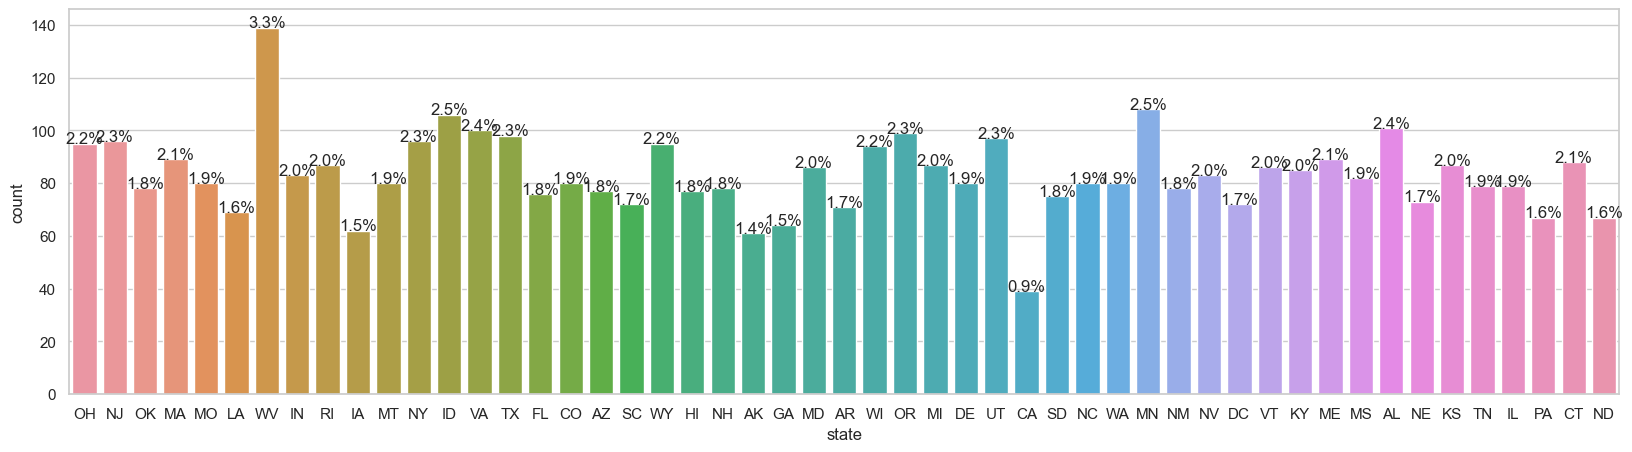

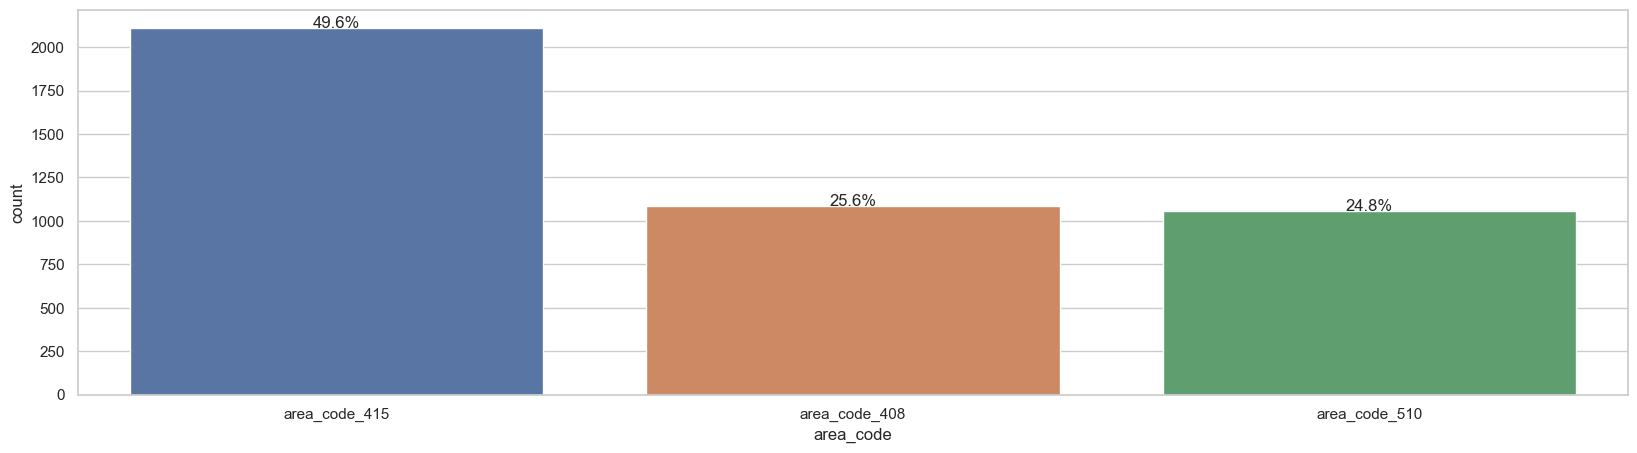

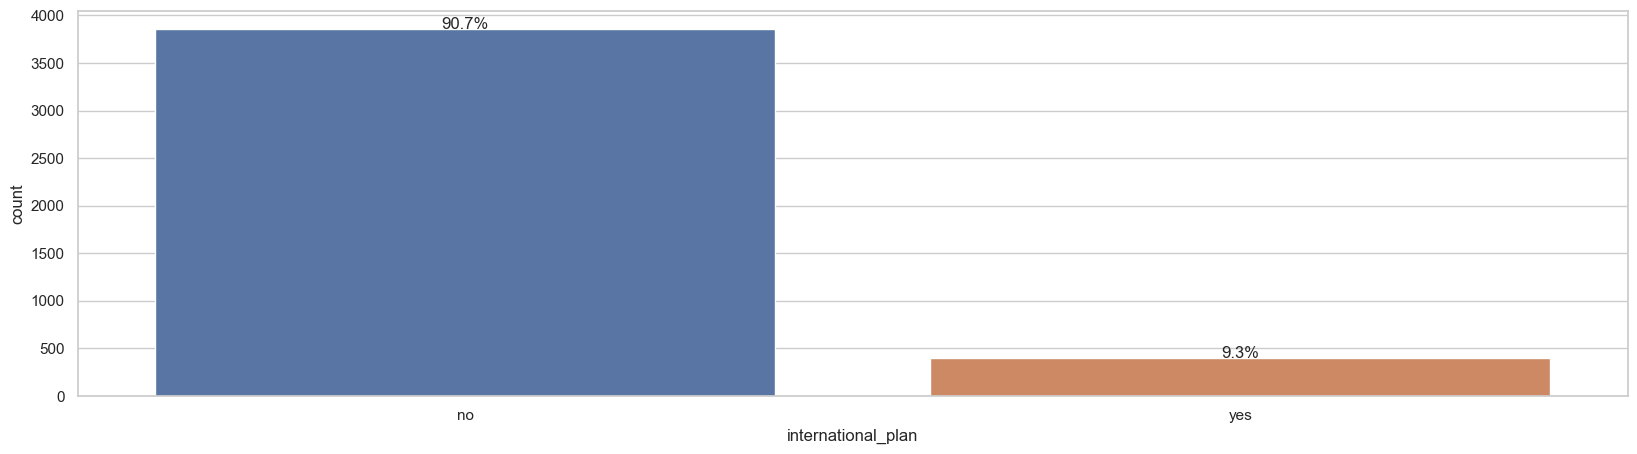

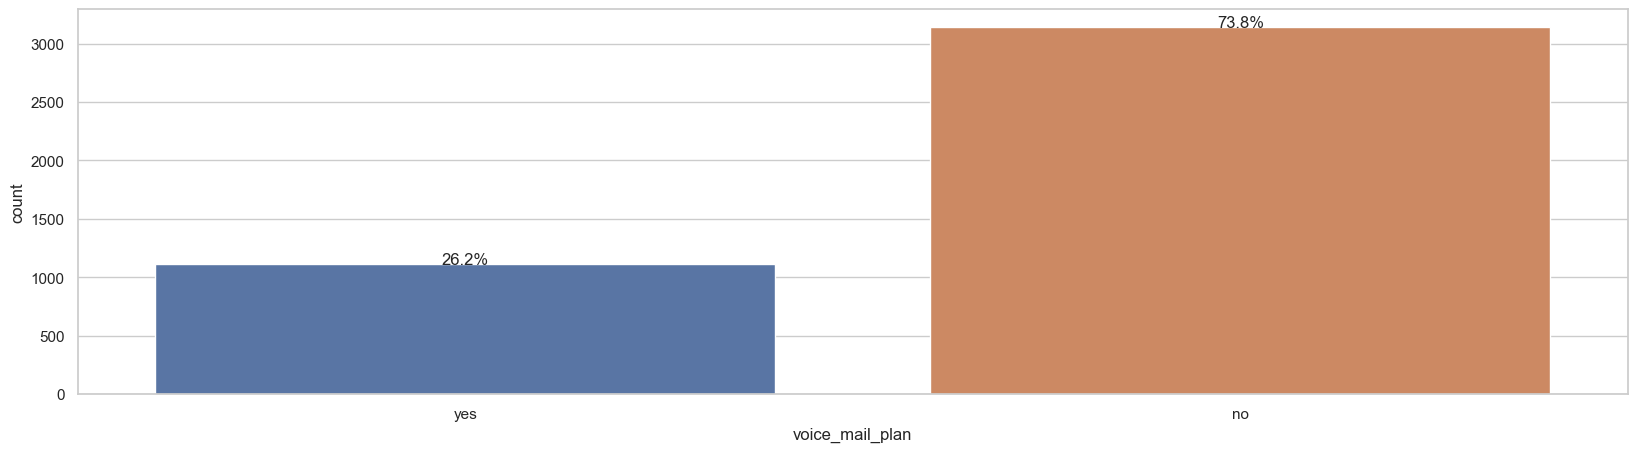

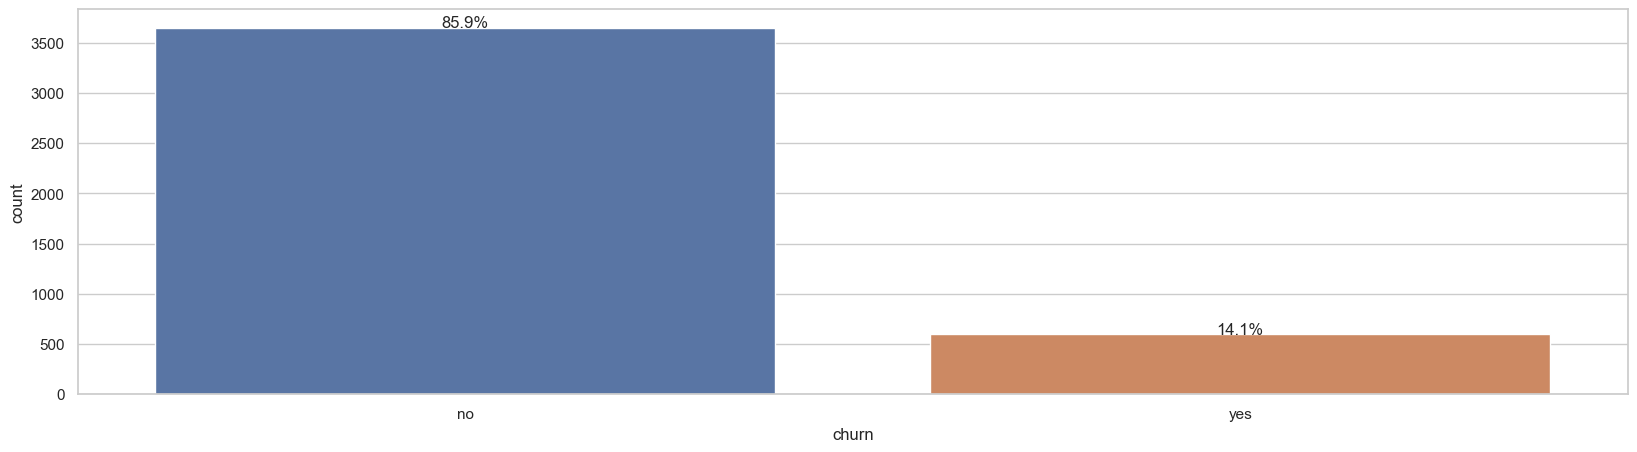

In [13]:
#display the all the categorical variable 
for feature in cat_var:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(data)
    ax = sns.countplot(x = data[feature], data = data)
    with_per(total, ax)
    plt.show()

### see the above plot:
- 90.7% customers disdn't have international plan
- 73.8% customers disdn't have voice mail plan
- 49.6% customers are living in the area code area_code_415
- only 14.1% customers are churn

In [14]:
# 2. Numerical Variables
#Extract the numerical features from the dataset
num_var = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


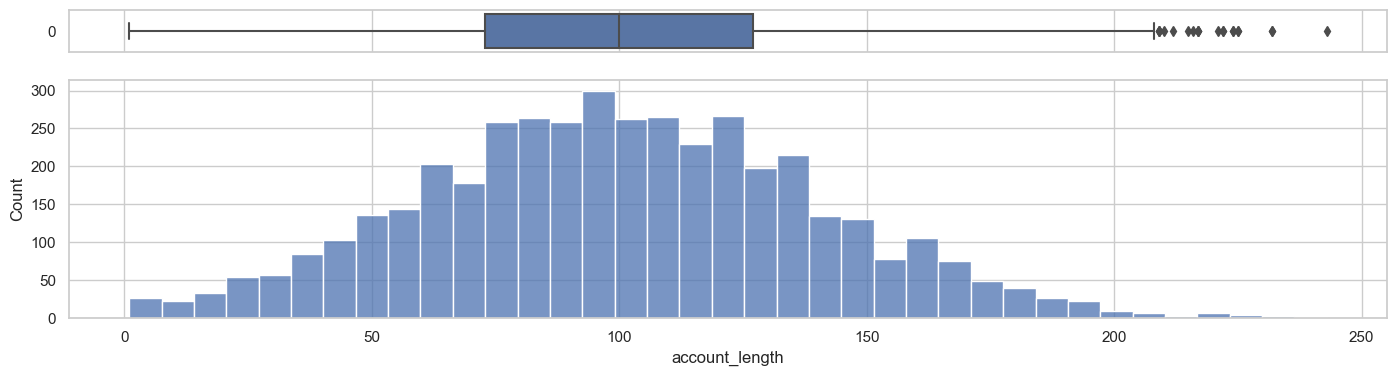

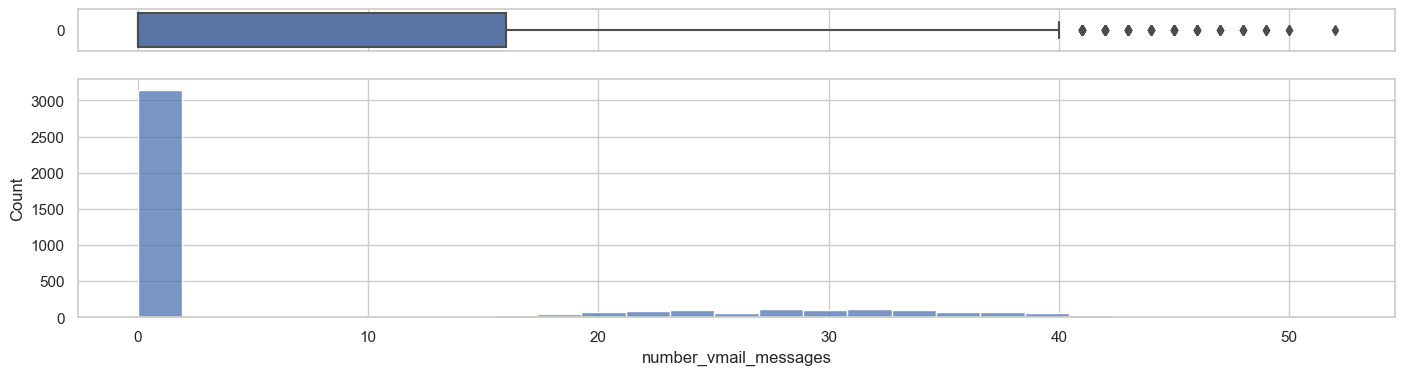

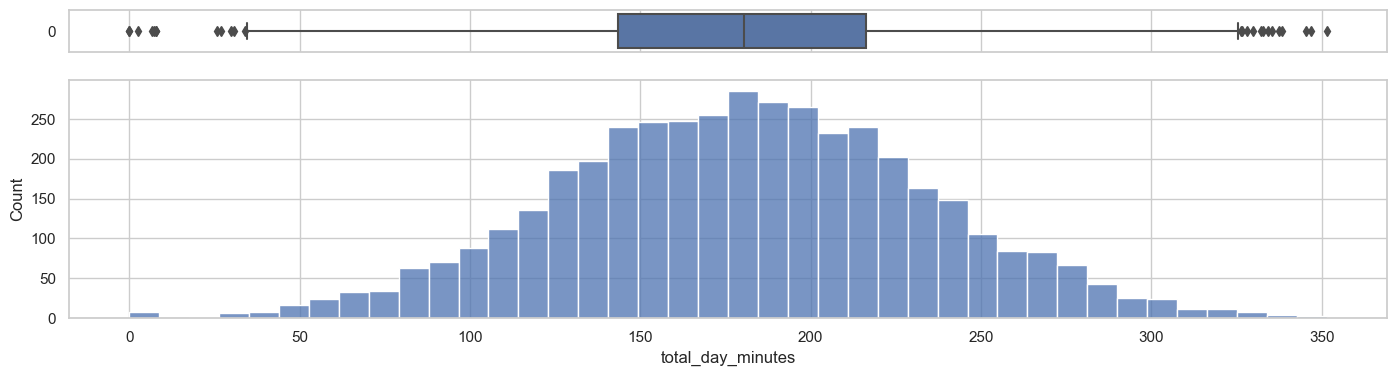

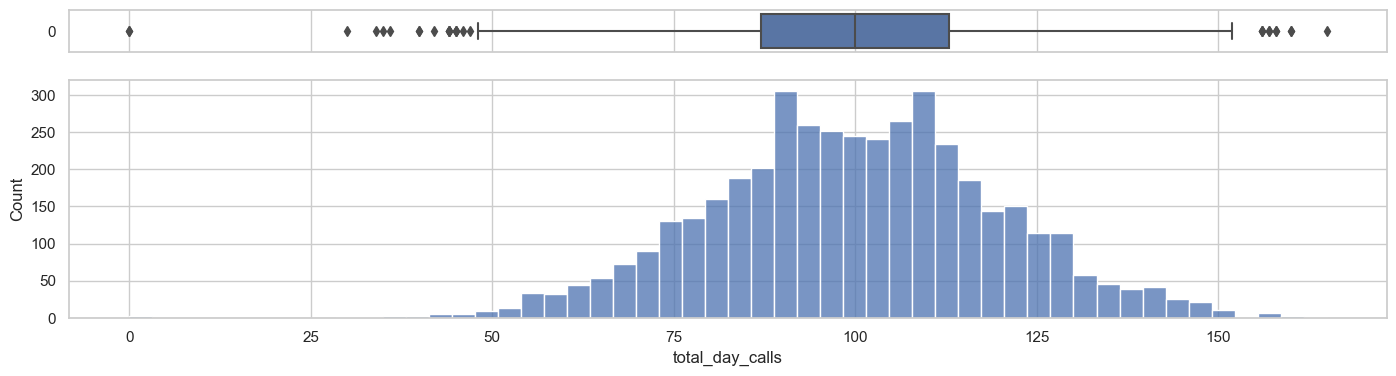

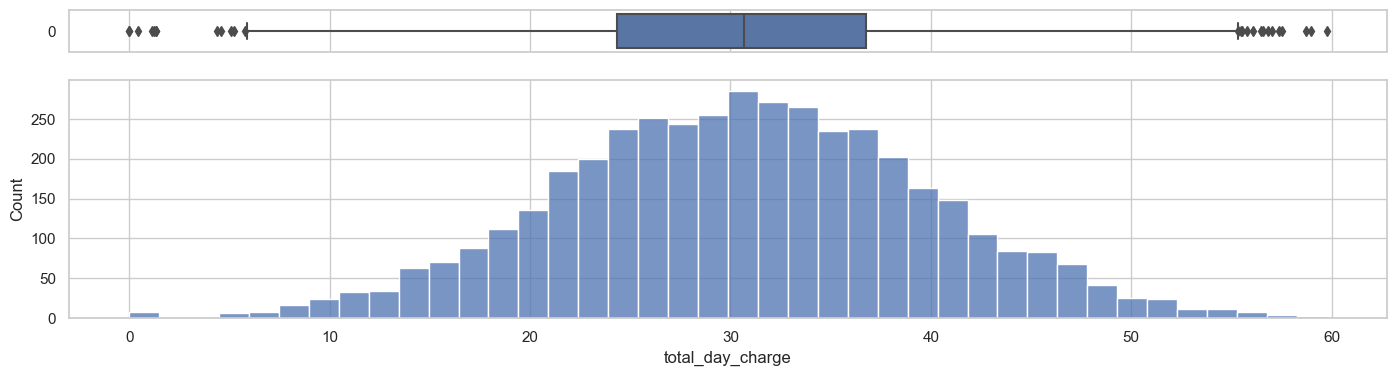

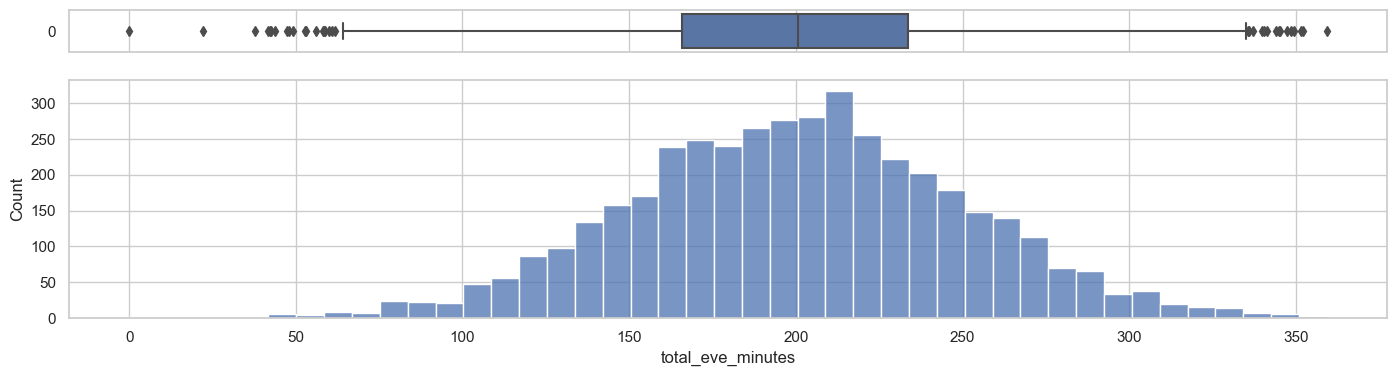

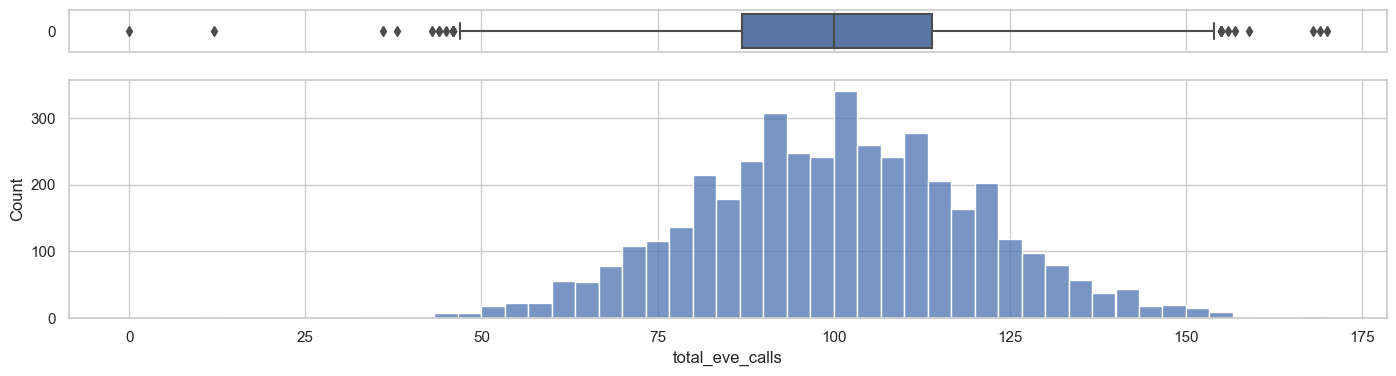

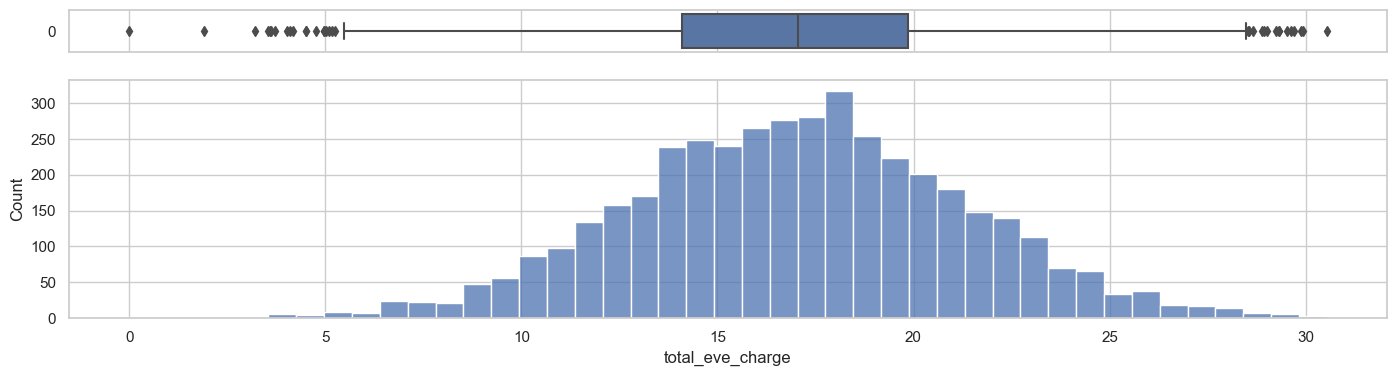

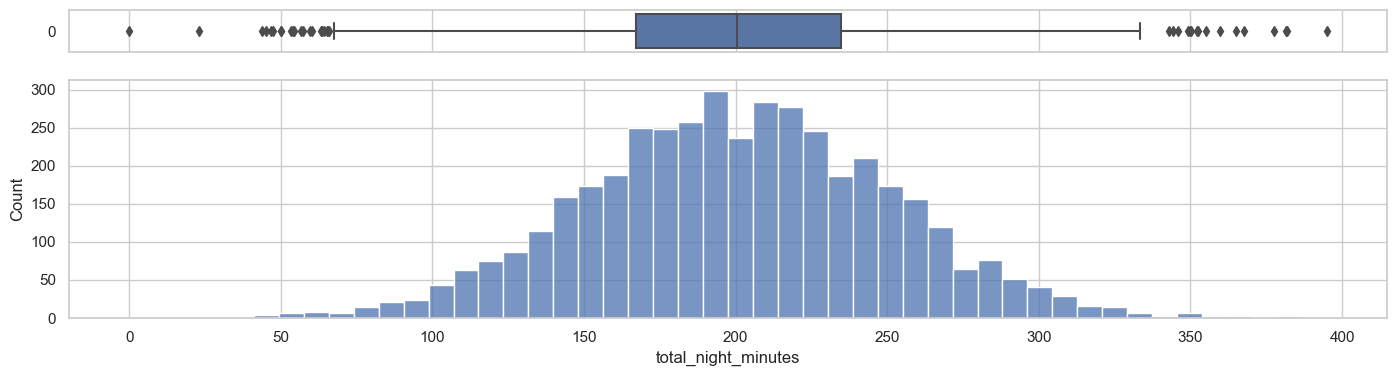

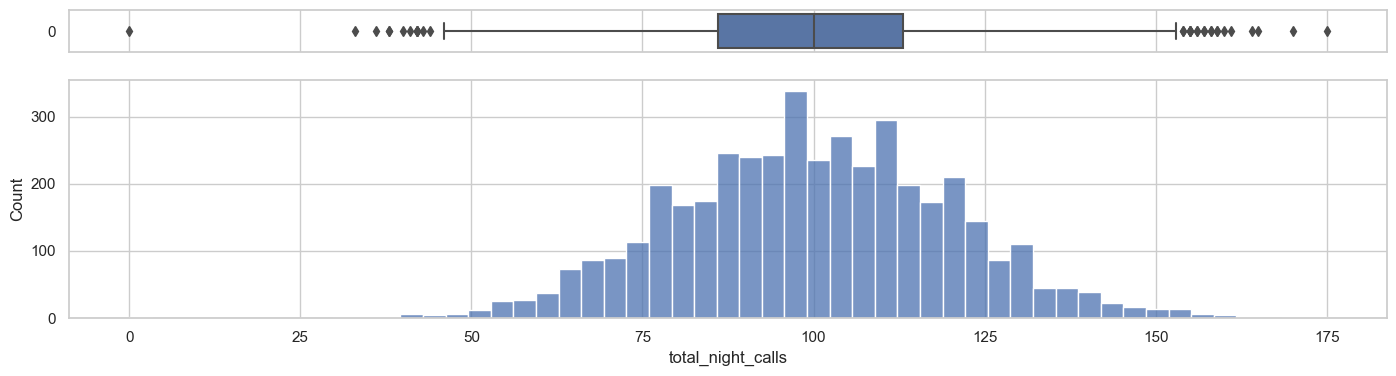

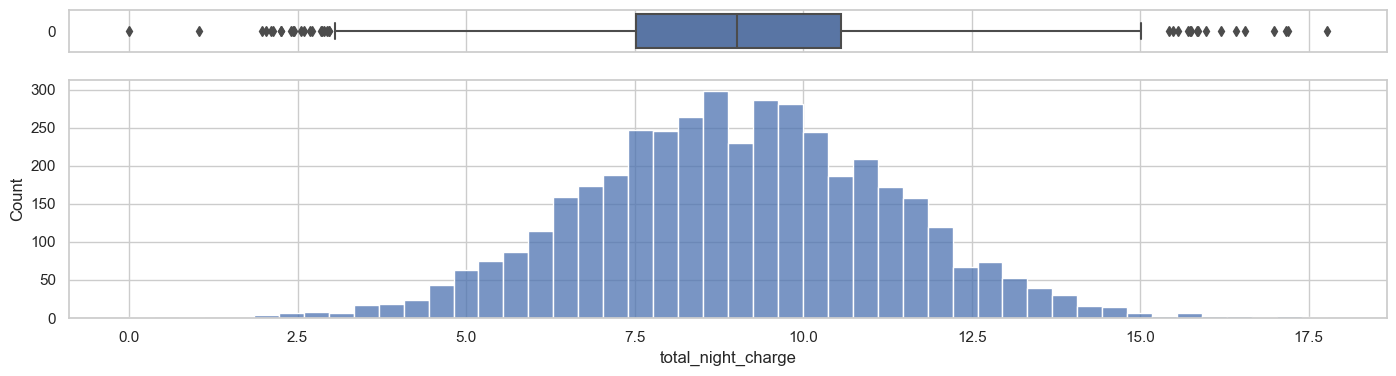

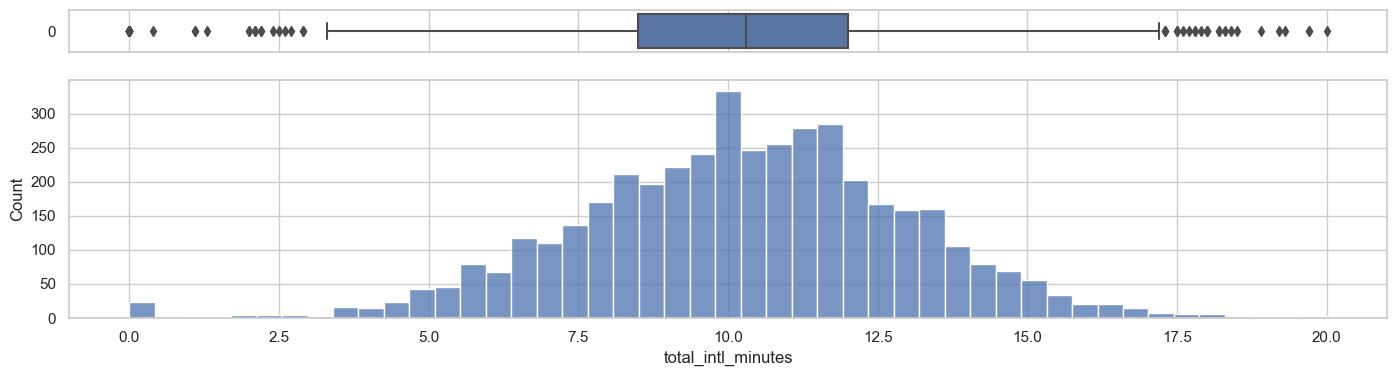

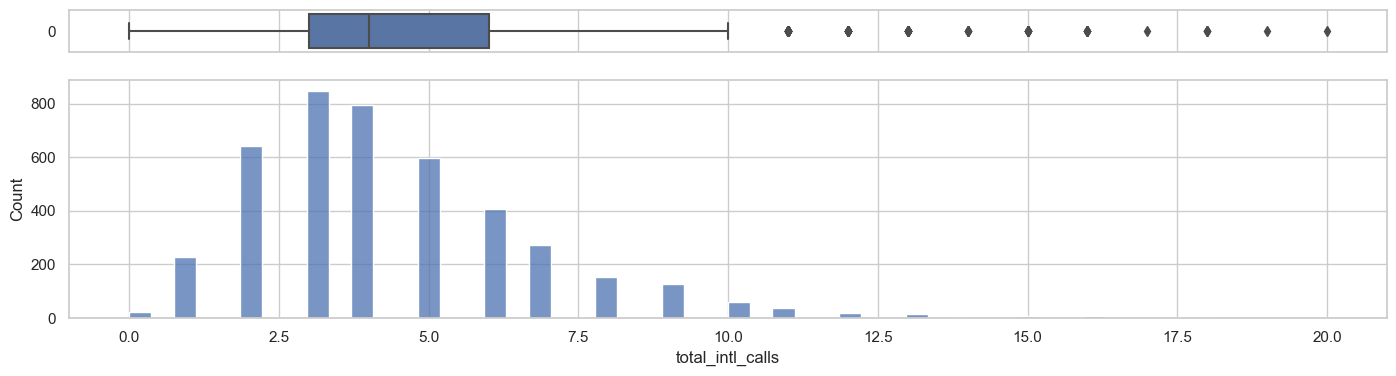

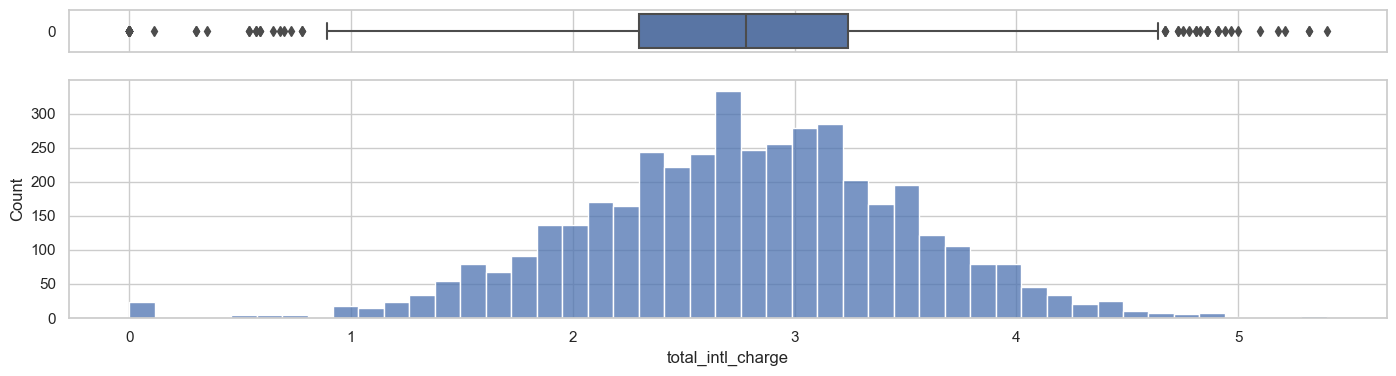

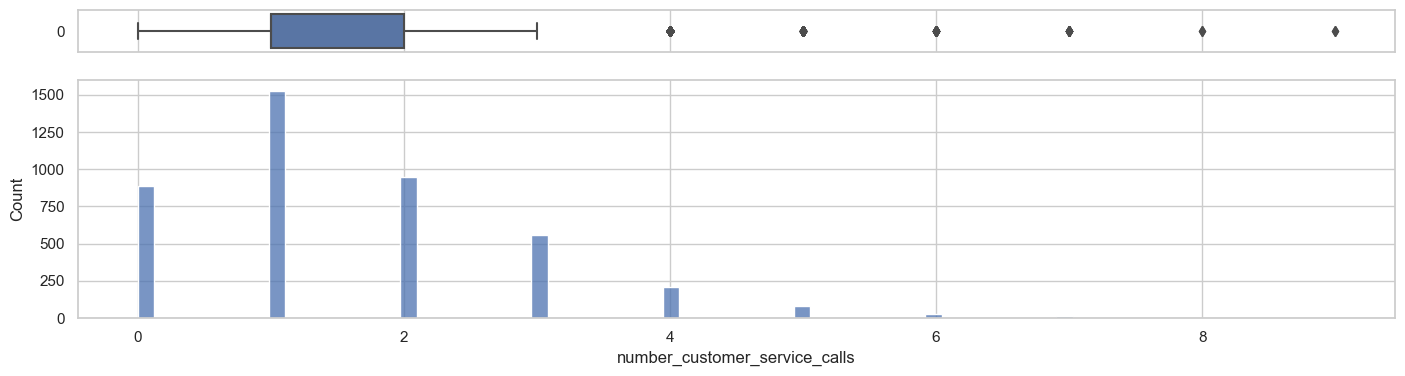

In [29]:
for feature in num_var:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.15, .85)})
    f.set_figheight(4)
    f.set_figwidth(17)
    sns.boxplot(data[feature], ax = ax_box, orient='h')
    sns.histplot(data = data, x = feature, ax = ax_hist)
    plt.show()

- number_customer_service_calls, total_internation_call and number_voice_mail_messages are not a normal distribuation so we can covert into normal distribution in feature engineering step
- other than the obove features all look like a normal distribuation

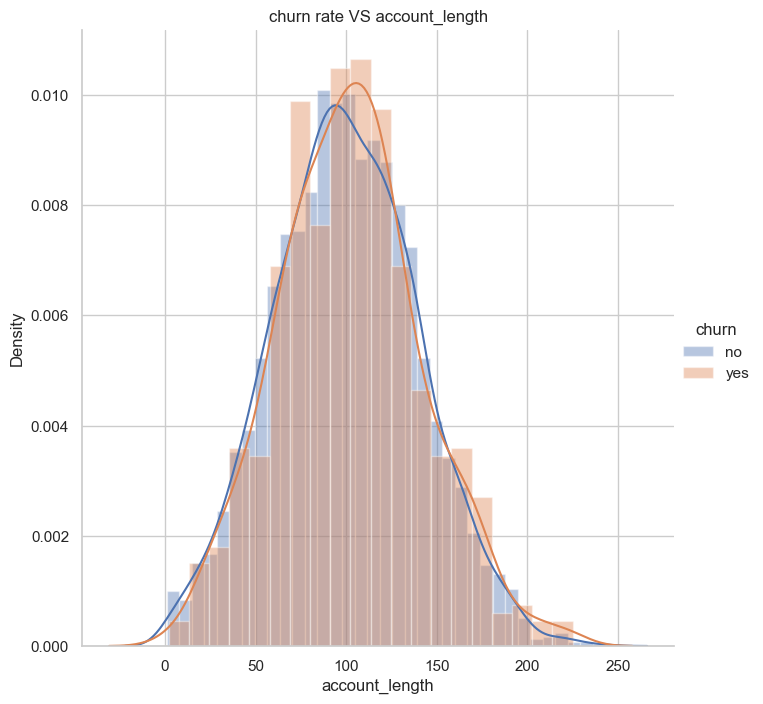

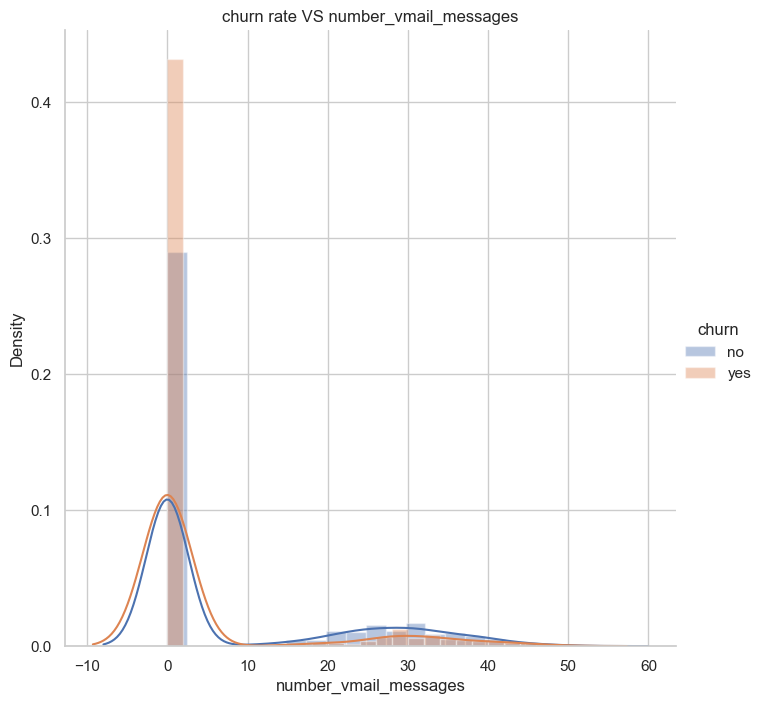

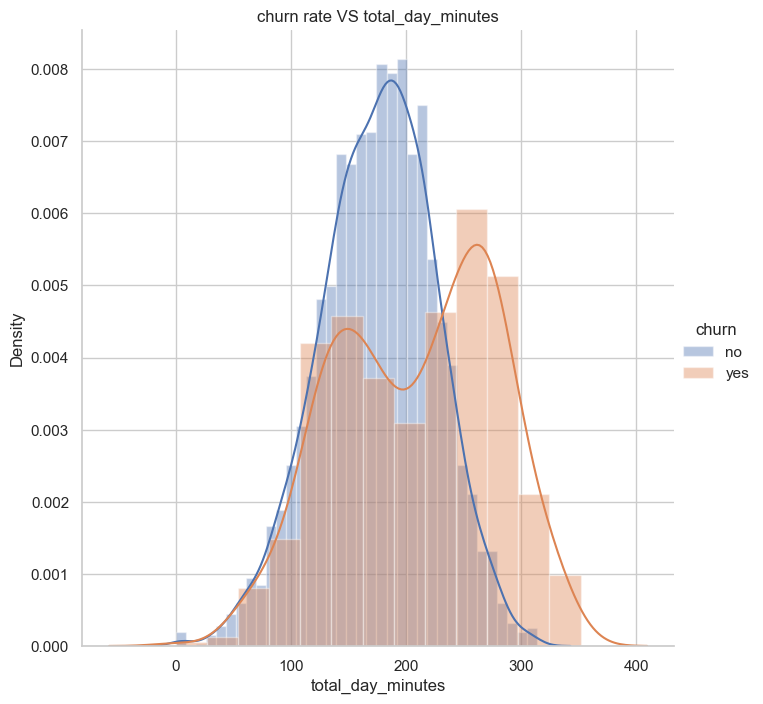

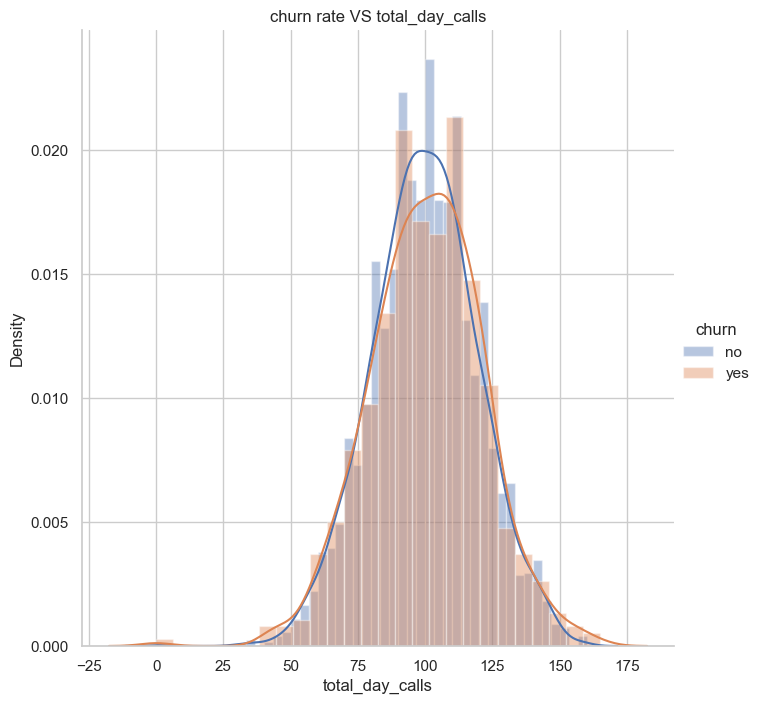

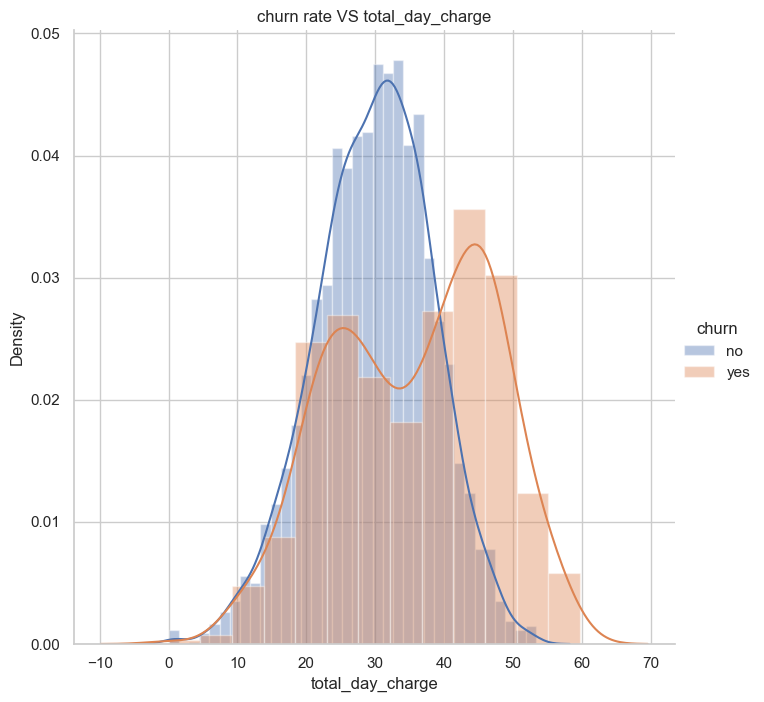

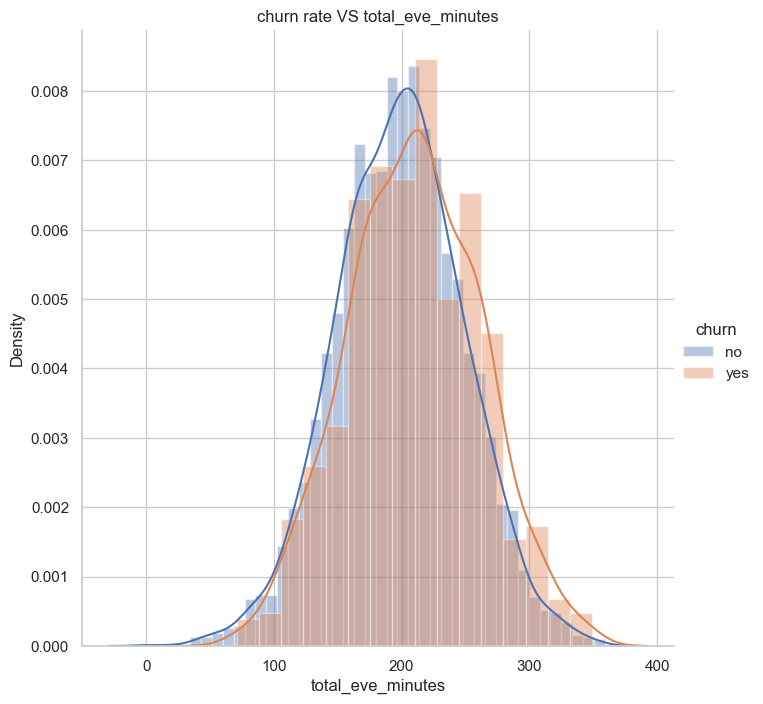

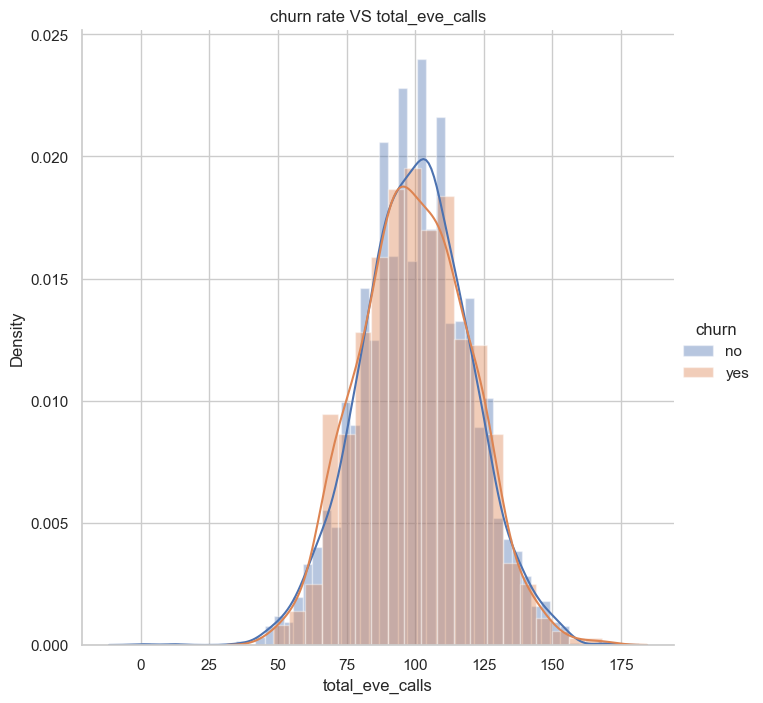

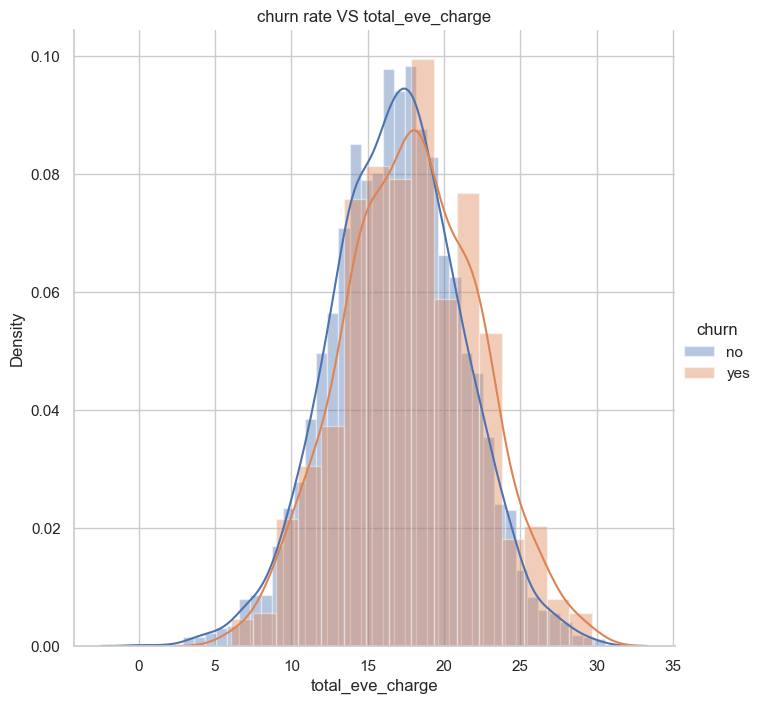

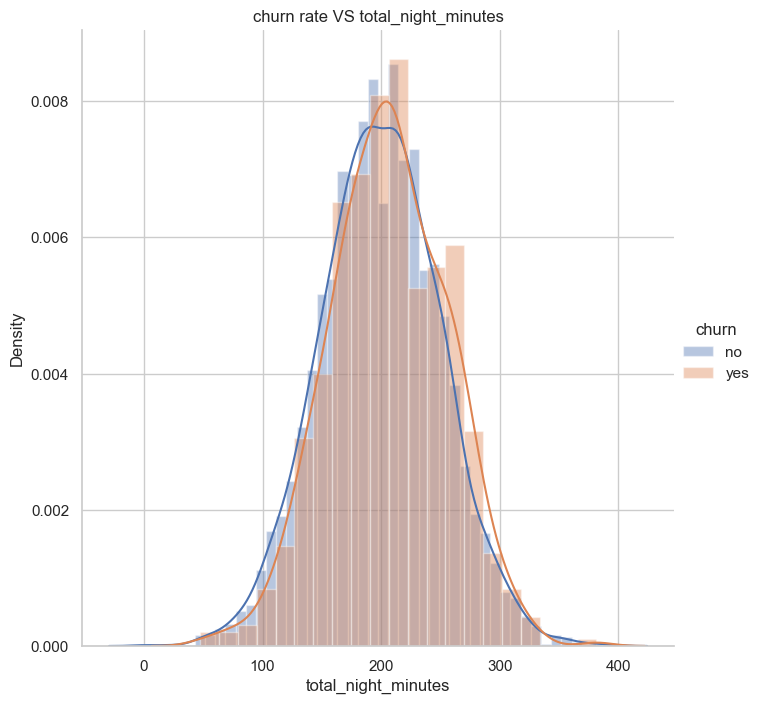

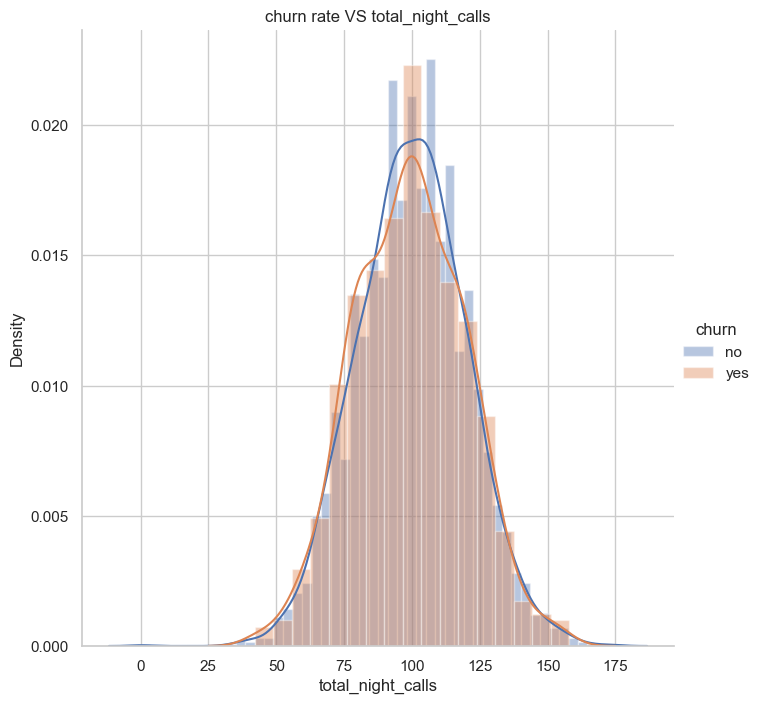

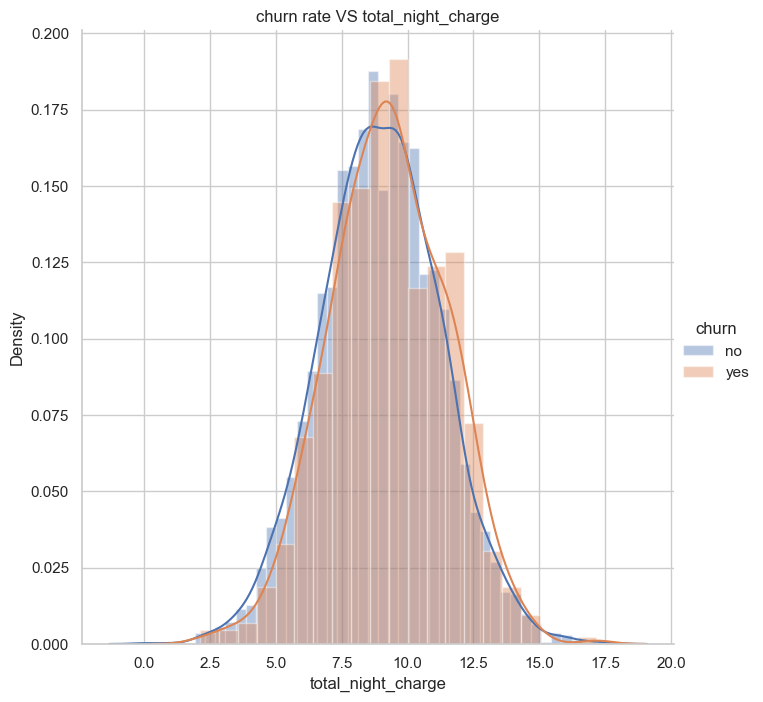

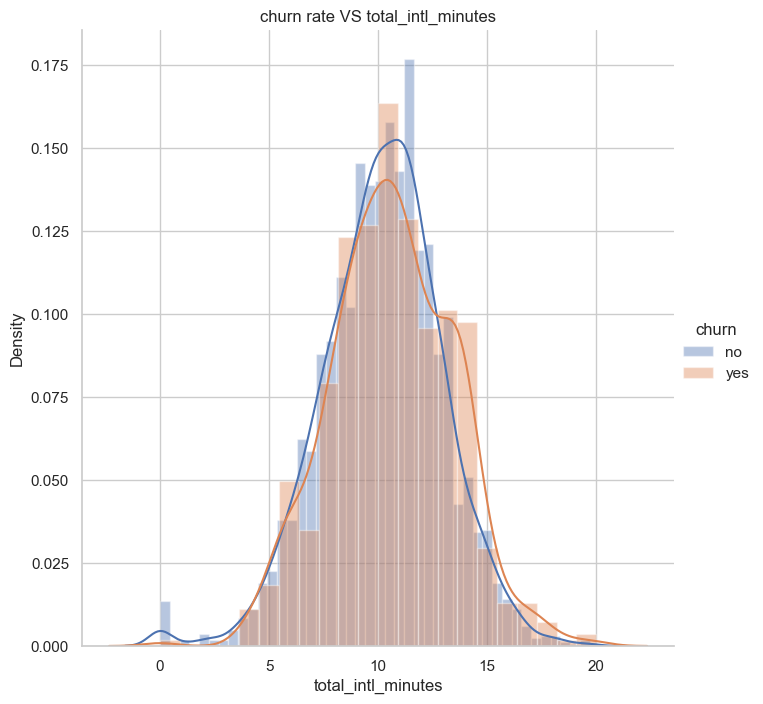

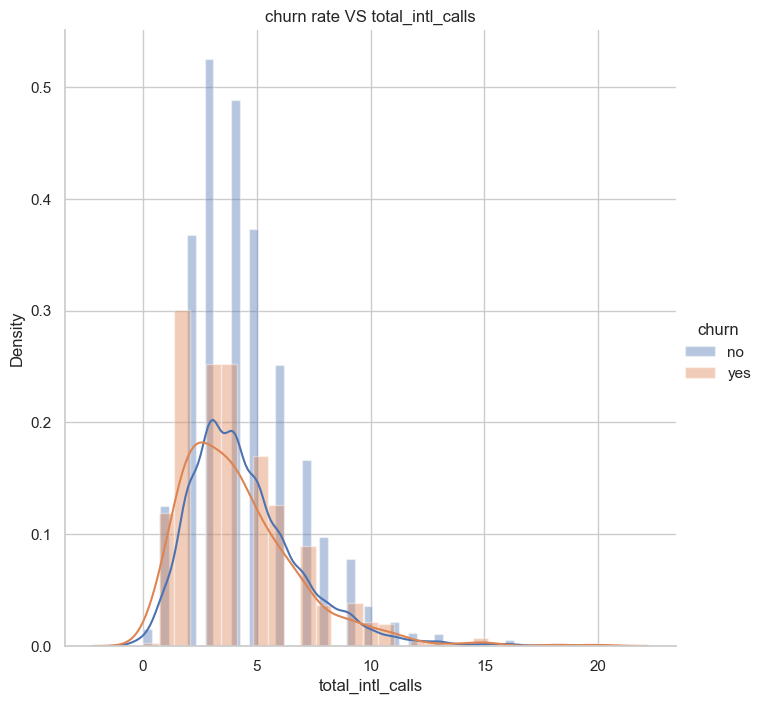

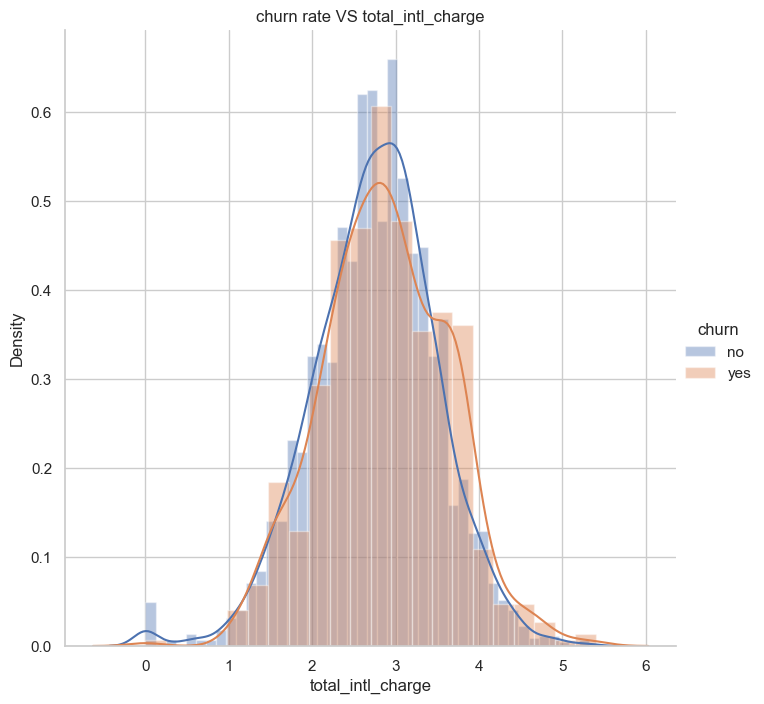

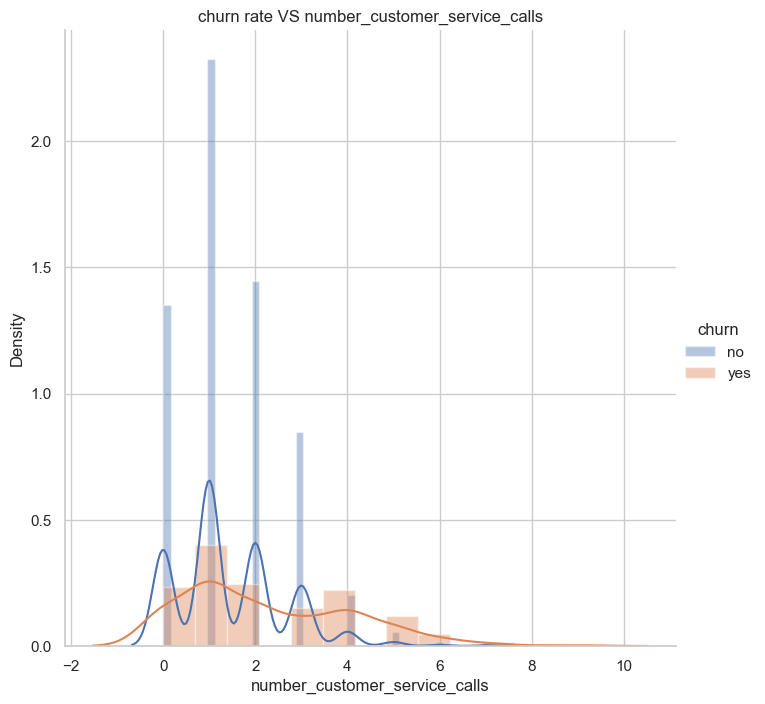

In [19]:
for feature in num_var:
    sns.FacetGrid(data, hue = 'churn', height = 7).map(sns.distplot, feature).add_legend()
    plt.title(f'churn rate VS {feature}')

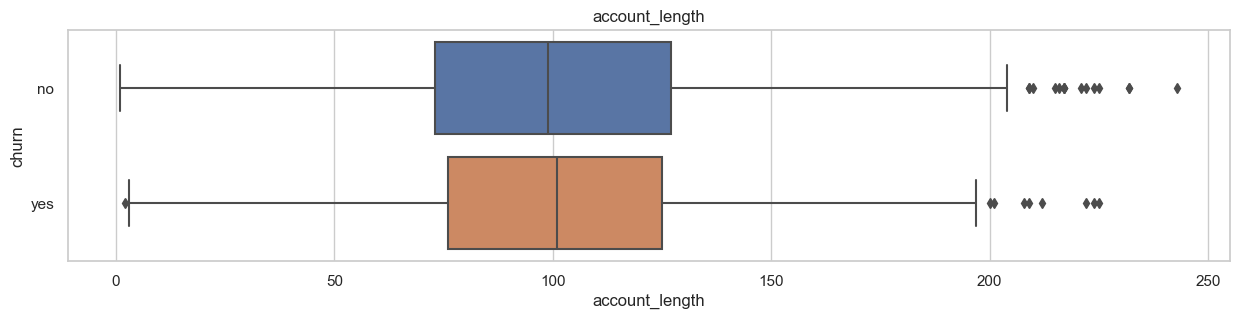

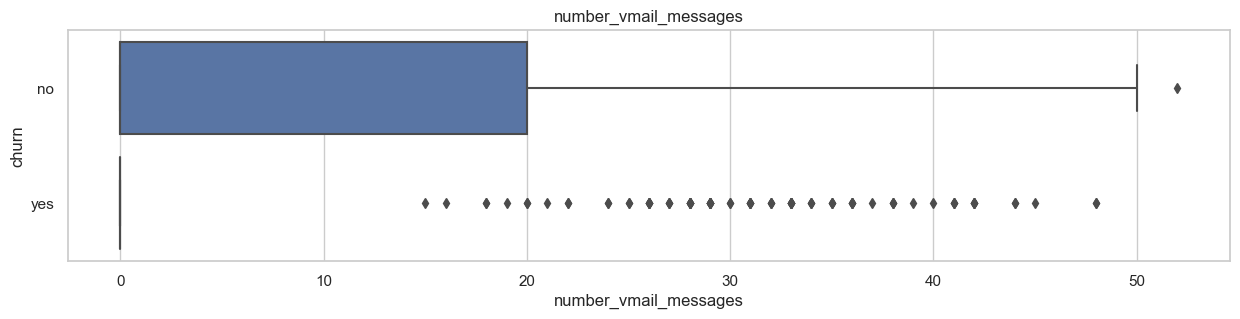

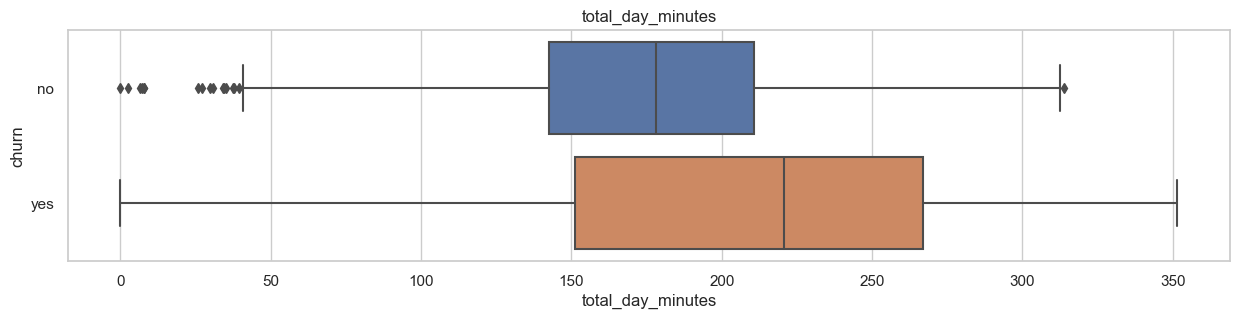

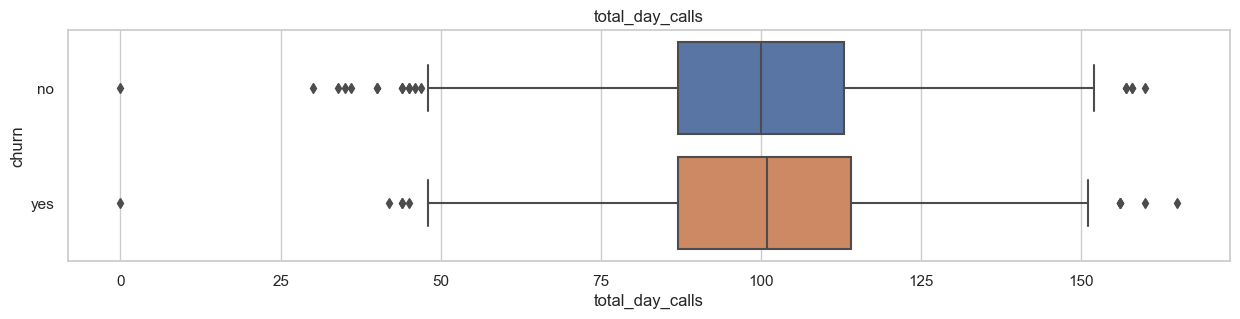

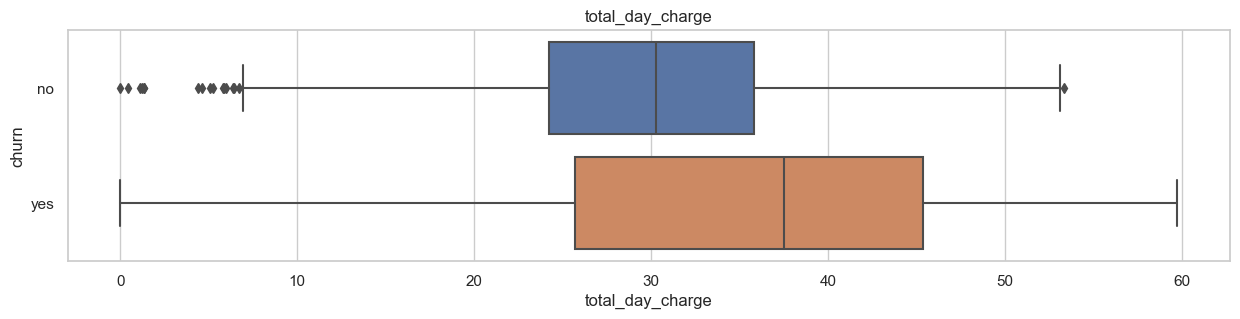

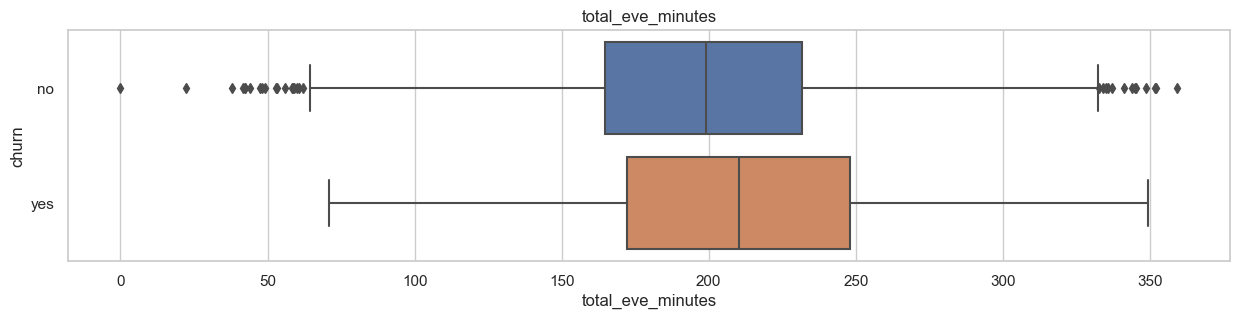

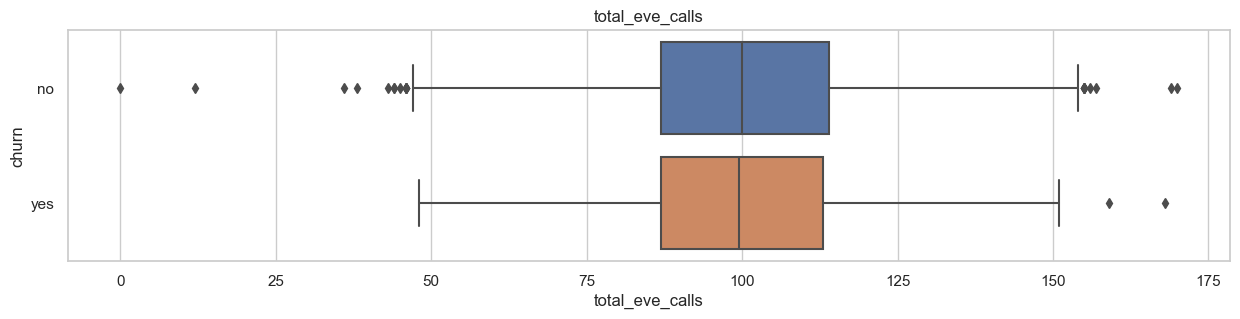

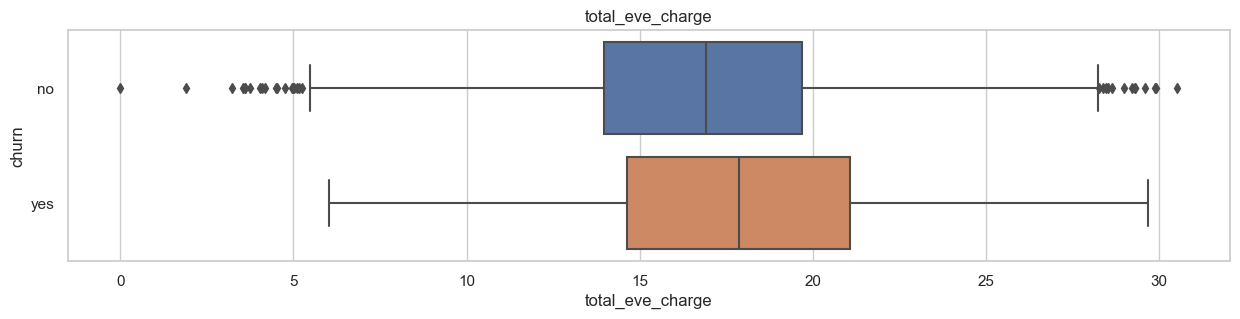

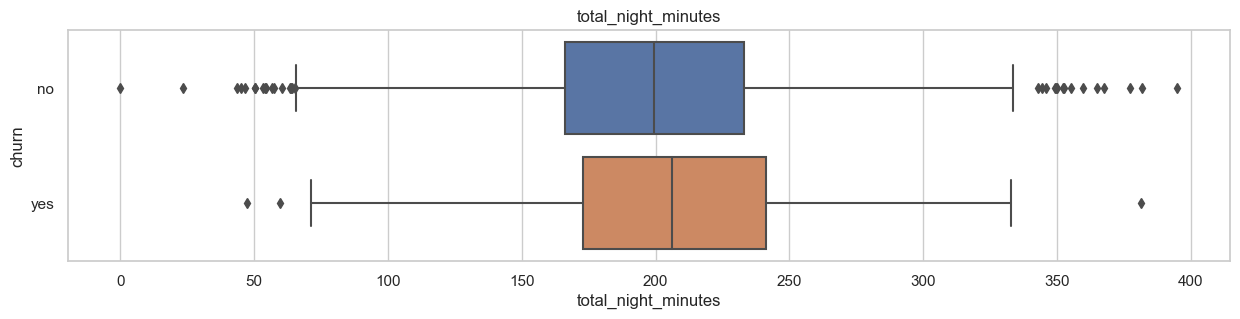

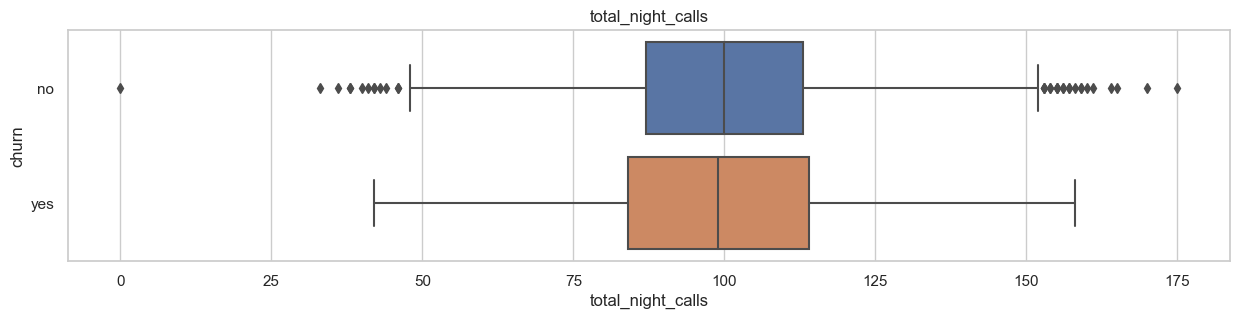

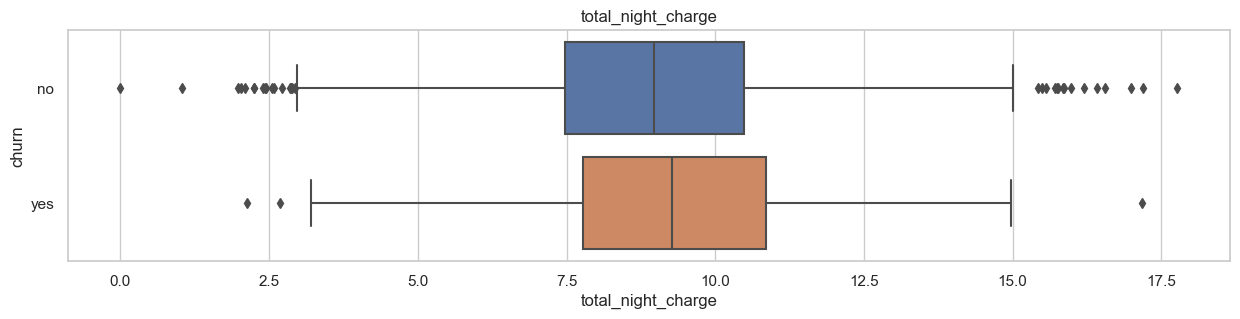

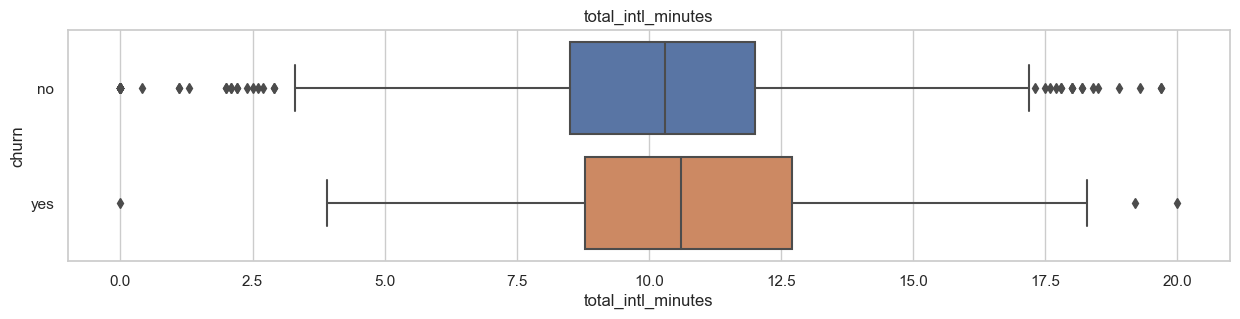

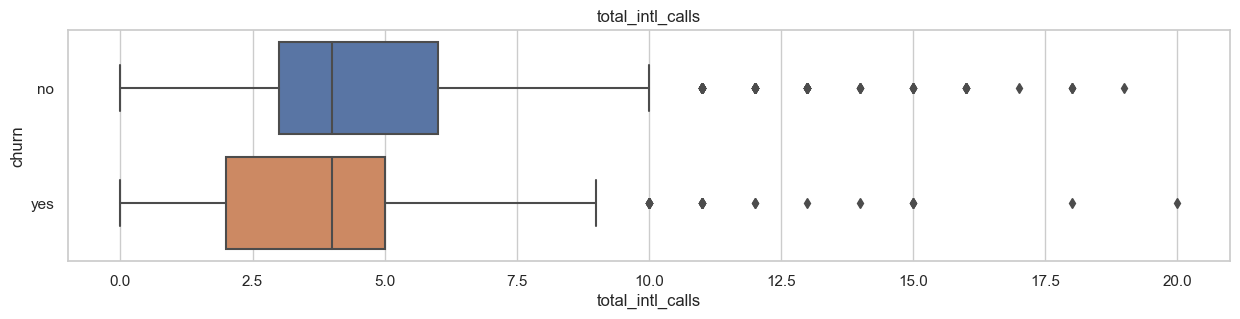

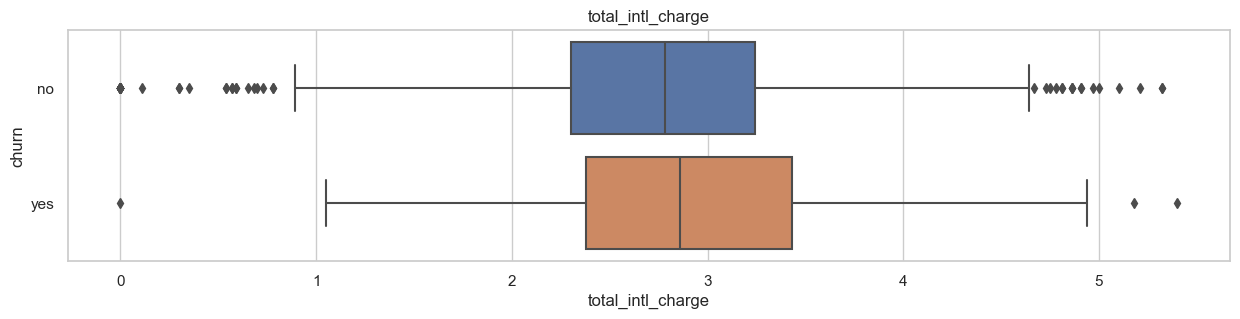

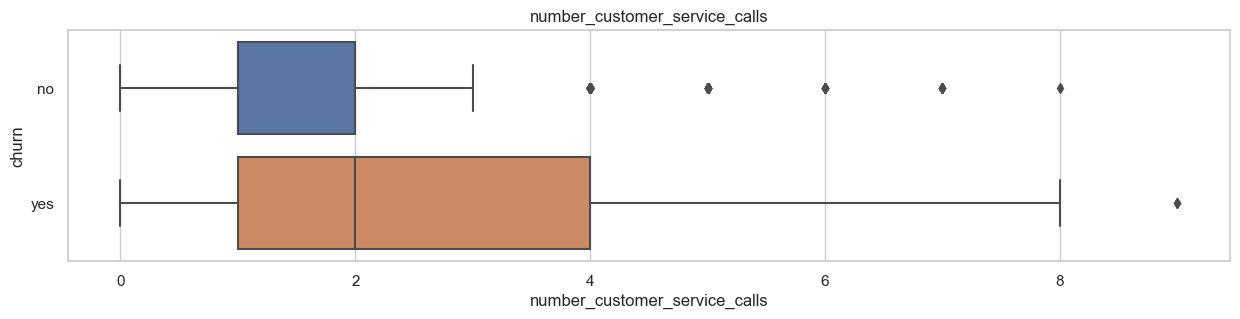

In [38]:
for feature in num_var:
    if feature != 'churn':
        plt.figure(figsize = (15,3))
        sns.boxplot(y = 'churn', x = feature, data = data)
        plt.title(feature)
        plt.show()

- every features has a outliers so we need to remove the outliers.
- outlies contains the some uesfull information.
- so we have to replace the outliers with some meaning full values
- so we should replace the outliers with meaning values

In [20]:
def IQR_OutlierDetector(data, onefeature, ConfParm = 1.5):
    col = onefeature
    datavalues = data[col]
    q1 = np.quantile(datavalues, 0.25)
    q3 = np.quantile(datavalues, 0.75)
    iqr = q3 - q1
    upper_bound = q3 + ConfParm * iqr
    lower_bound = q1 - ConfParm * iqr

    LowerOutlierData = [(idx, val) for idx, val in datavalues.items() if val < lower_bound]
    UpperOutlierData = [(idx, val) for idx, val in datavalues.items() if val > upper_bound]

    return LowerOutlierData, UpperOutlierData, [lower_bound, upper_bound]

In [36]:
def IQR_OutlierAnalysis(data, onefeature, LowerOutlierData, UpperOutlierData, ConfRange,target):
    datavalues = data[onefeature]
    print(f"Lower Outlier Data : {len(LowerOutlierData)}")
    print(LowerOutlierData)
    TargetLowerOutlierData = [data.loc[idx, target] for idx, val in LowerOutlierData]
    print(TargetLowerOutlierData)

    print(f"Upper Outlier Data : {len(UpperOutlierData)}")
    print(UpperOutlierData)
    TargetUpperOutlierData = [data.loc[idx, target] for idx, val in UpperOutlierData]
    print(TargetUpperOutlierData)

def IQR_OutlierVisualization(data, onefeature):
    datavalues = data[onefeature]
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    f.set_figheight(3)
    f.set_figwidth(15)
    sns.boxplot(data = datavalues, ax=ax_box, orient='h')
    sns.histplot(data=data, x=onefeature, ax=ax_hist)
    plt.show()

In [22]:
def IQR_ImputeNoise(data, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target):
    df = data[(data[onefeature] >= ConfRange[0]) & (data[onefeature] <= ConfRange[1])]
    TargetDict = { val : np.median(df[df[target] == val][onefeature])  for val in df[target].unique()}

    for idx,val in LowerOutlierData:
        data.loc[idx, onefeature] = TargetDict[data.loc[idx, target]]

    for idx,val in UpperOutlierData:
        data.loc[idx, onefeature] = TargetDict[data.loc[idx, target]]
    
    return data[onefeature], TargetDict

In [23]:
print(num_var)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [24]:
target = 'churn'
train = data.copy()

Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 20
[(197, 215), (256, 209), (343, 224), (684, 243), (877, 217), (1193, 232), (1304, 225), (1472, 225), (1593, 224), (1828, 212), (1923, 210), (1939, 217), (2289, 209), (2725, 221), (2736, 209), (3679, 216), (3711, 222), (3719, 232), (3932, 217), (4079, 222)]
['no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes']


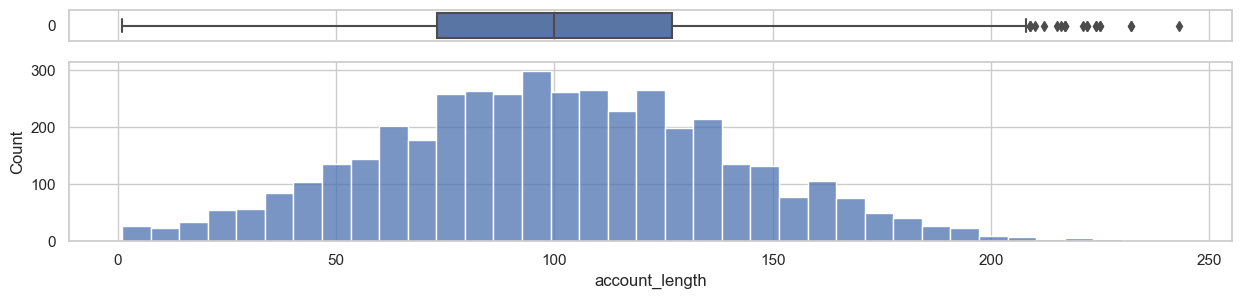

{'no': 99.0, 'yes': 101.0}


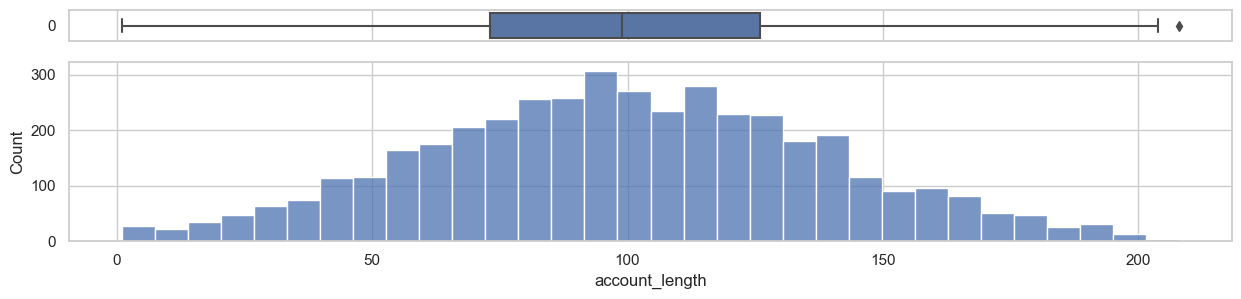

In [37]:
onefeature = "account_length"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)

train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 86
[(32, 41), (52, 41), (58, 46), (96, 42), (122, 43), (207, 41), (229, 48), (290, 41), (350, 45), (454, 41), (495, 46), (508, 43), (589, 42), (660, 45), (681, 41), (731, 43), (845, 42), (864, 42), (911, 42), (1167, 42), (1169, 43), (1220, 47), (1230, 44), (1241, 41), (1256, 44), (1346, 49), (1351, 44), (1456, 43), (1483, 42), (1514, 47), (1529, 42), (1544, 42), (1558, 43), (1615, 45), (1638, 42), (1947, 42), (2011, 45), (2091, 45), (2126, 41), (2135, 42), (2181, 43), (2213, 46), (2278, 44), (2303, 50), (2343, 44), (2407, 41), (2443, 50), (2565, 42), (2674, 47), (2683, 44), (2691, 43), (2693, 41), (2755, 44), (2784, 43), (2790, 42), (2838, 43), (2850, 41), (2913, 46), (2978, 45), (2979, 49), (2996, 46), (3022, 49), (3092, 41), (3132, 41), (3160, 42), (3235, 45), (3247, 42), (3264, 42), (3305, 43), (3330, 41), (3334, 41), (3414, 41), (3443, 47), (3614, 41), (3620, 46), (3675, 45), (3763, 46), (3816, 45), (3828, 48), (3895, 43), (3928, 45

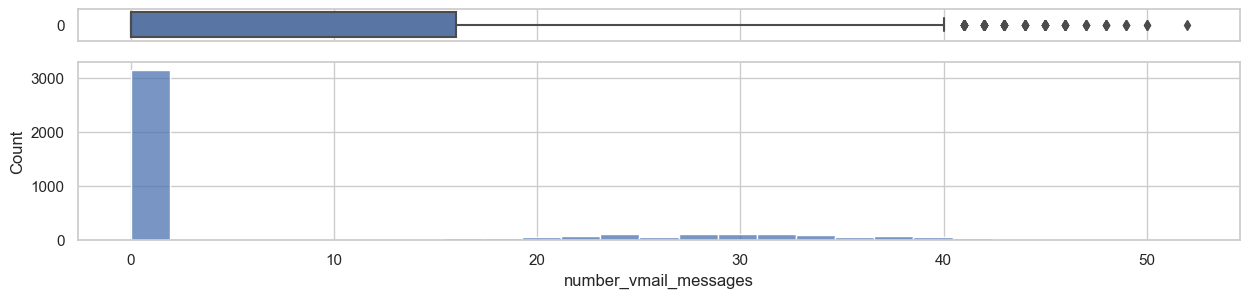

In [38]:
onefeature = "number_vmail_messages"
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(data, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(data , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, 'churn')
IQR_OutlierVisualization(data, onefeature)

In [27]:
data[onefeature].value_counts()[:10]

0     3139
31      69
28      58
24      57
29      57
33      55
27      54
26      53
30      47
32      47
Name: number_vmail_messages, dtype: int64

Lower Outlier Data : 5
[(1222, 8), (1680, 4), (2048, 8), (2852, 6), (3214, 6)]
['no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 3
[(2303, 50), (2443, 50), (4005, 52)]
['no', 'no', 'no']


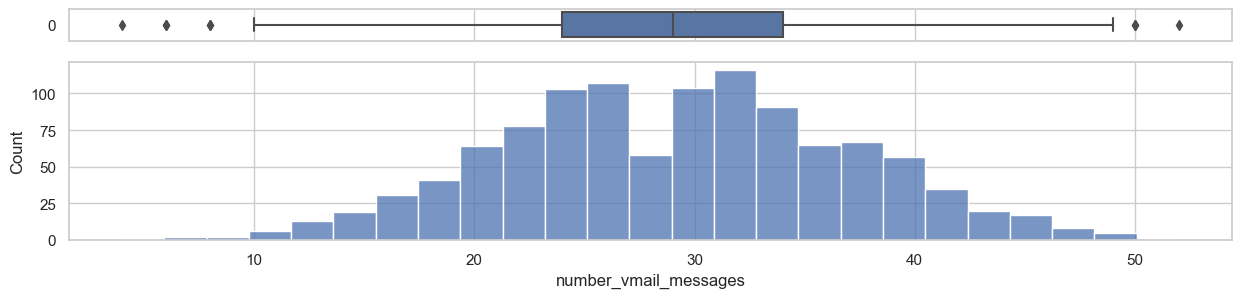

{'no': 29.0, 'yes': 31.0}


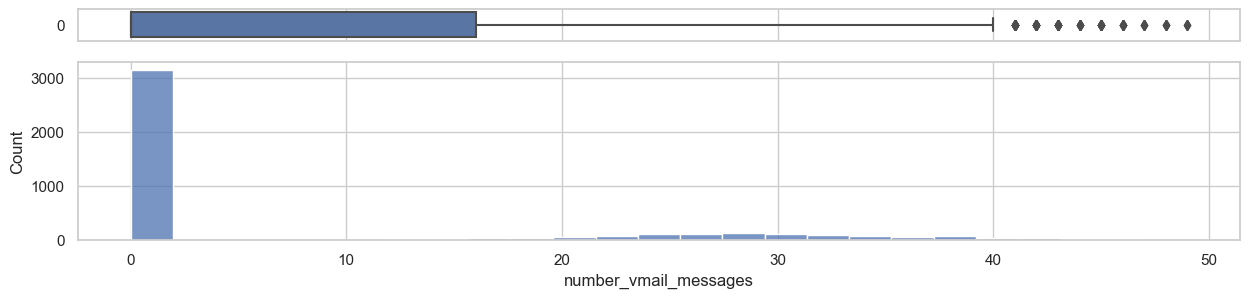

In [39]:
onefeature = "number_vmail_messages"
DataNoise = data[data[onefeature] != 0]
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)

train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 12
[(570, 30.9), (618, 34.0), (900, 25.9), (1138, 0.0), (1183, 0.0), (1683, 7.9), (1805, 27.0), (2318, 2.6), (2332, 7.8), (2691, 29.9), (4157, 6.6), (4234, 7.2)]
['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 13
[(12, 332.9), (129, 337.4), (162, 326.5), (500, 335.5), (817, 334.3), (827, 346.8), (1415, 329.8), (1717, 328.1), (2051, 326.3), (2202, 345.3), (2921, 338.4), (3381, 351.5), (3494, 332.1)]
['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']


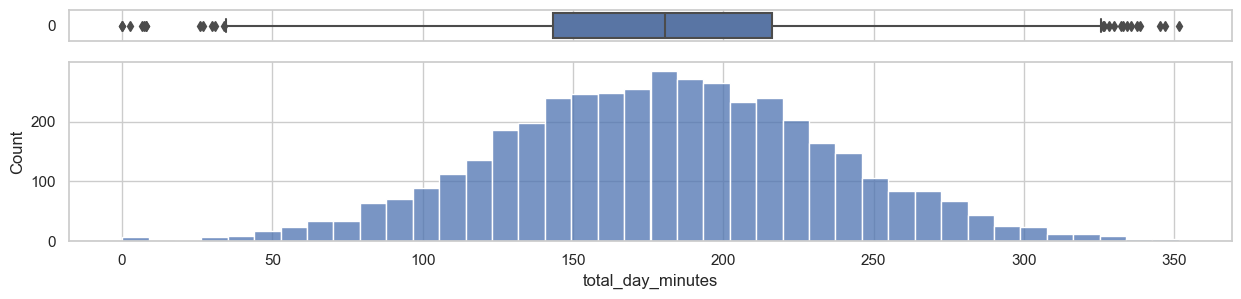

In [40]:
onefeature = "total_day_minutes"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)

{'no': 178.4, 'yes': 217.05}


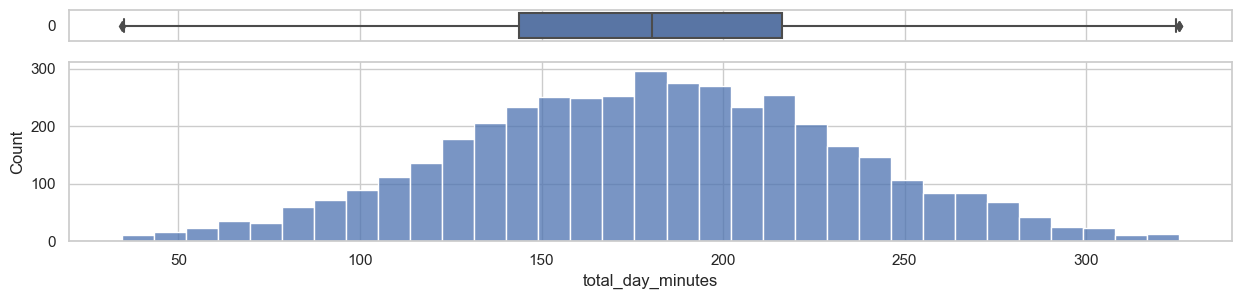

In [41]:
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 18
[(119, 47), (575, 36), (617, 40), (960, 30), (1119, 42), (1138, 0), (1139, 45), (1183, 0), (1205, 45), (1686, 35), (2119, 45), (2441, 44), (2442, 44), (2509, 44), (2702, 40), (3434, 34), (3763, 44), (3780, 46)]
['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no']
Upper Outlier Data : 10
[(262, 158), (887, 158), (942, 165), (1235, 160), (1578, 156), (2034, 157), (3579, 156), (3639, 156), (3649, 157), (3871, 160)]
['no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']


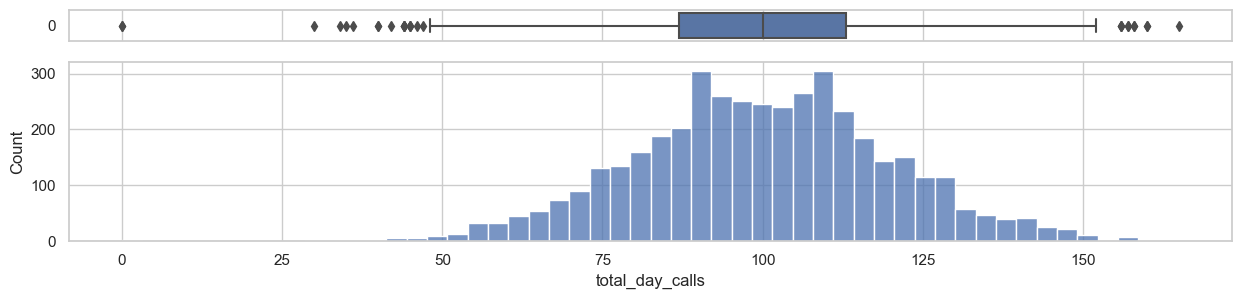

In [42]:
onefeature = "total_day_calls"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)

{'no': 100.0, 'yes': 101.0}


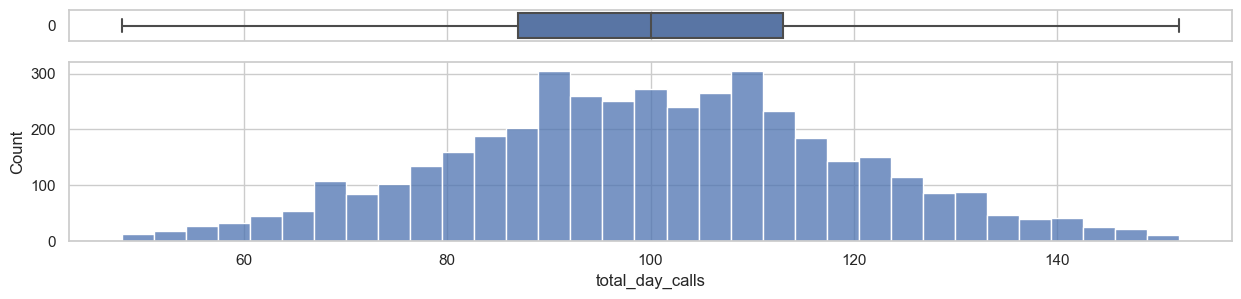

In [43]:
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 12
[(570, 5.25), (618, 5.78), (900, 4.4), (1138, 0.0), (1183, 0.0), (1683, 1.34), (1805, 4.59), (2318, 0.44), (2332, 1.33), (2691, 5.08), (4157, 1.12), (4234, 1.22)]
['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 14
[(12, 56.59), (129, 57.36), (162, 55.51), (500, 57.04), (817, 56.83), (827, 58.96), (1415, 56.07), (1717, 55.78), (2051, 55.47), (2202, 58.7), (2921, 57.53), (3381, 59.76), (3494, 56.46), (3791, 55.34)]
['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']


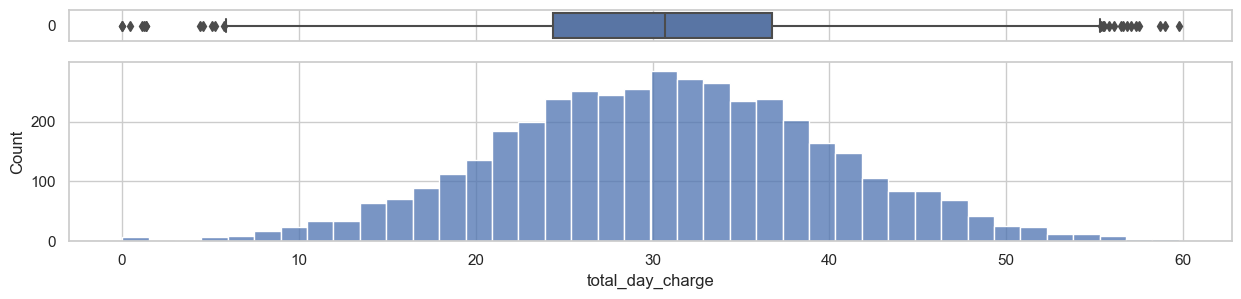

In [44]:
onefeature = "total_day_charge" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)

{'no': 30.33, 'yes': 36.87}


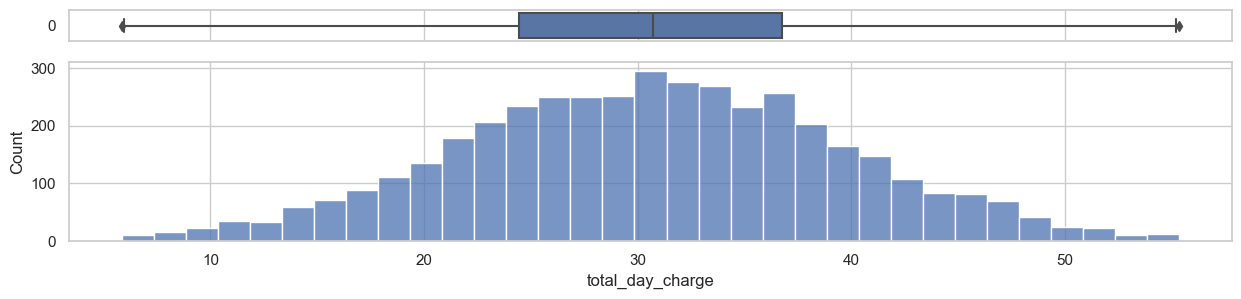

In [45]:
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 19
[(2, 61.9), (442, 42.2), (486, 58.9), (688, 43.9), (712, 52.9), (744, 42.5), (748, 60.8), (885, 58.6), (997, 56.0), (1036, 48.1), (1129, 60.0), (1661, 49.2), (2482, 0.0), (2859, 22.3), (3213, 58.3), (3377, 37.8), (3384, 41.7), (3707, 47.3), (3717, 53.2)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 15
[(4, 348.5), (6, 351.6), (439, 337.1), (479, 347.3), (1075, 336.0), (1838, 339.9), (1986, 335.7), (2602, 341.3), (3345, 344.0), (3524, 349.4), (3854, 344.9), (3873, 352.1), (3924, 345.1), (4157, 359.3), (4244, 340.3)]
['no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes']


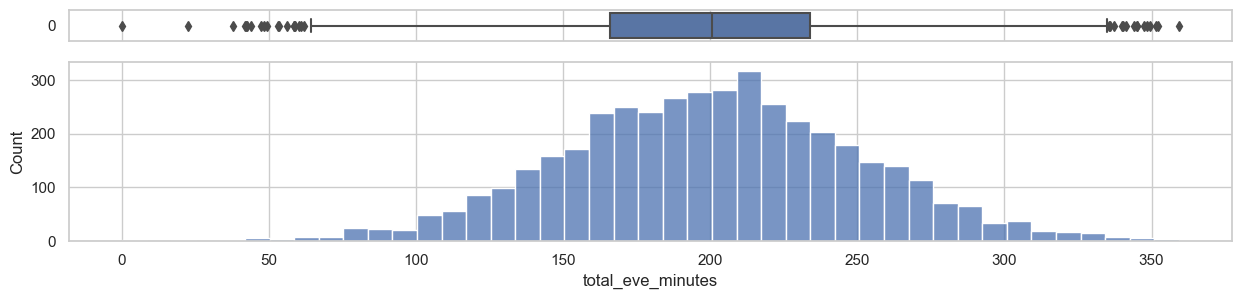

{'no': 199.4, 'yes': 209.9}


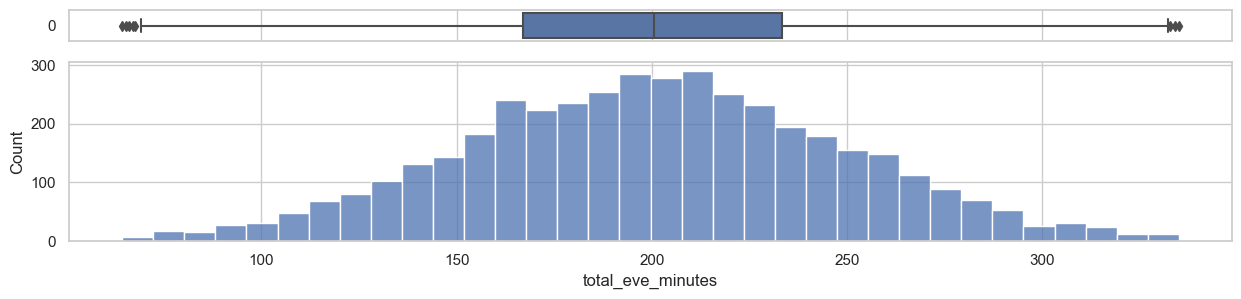

In [46]:
onefeature = "total_eve_minutes" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 13
[(127, 46), (803, 12), (1066, 45), (1361, 36), (1455, 46), (1567, 44), (2200, 46), (2418, 43), (2482, 0), (2837, 46), (2982, 46), (4028, 38), (4217, 44)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 11
[(249, 168), (856, 157), (896, 155), (1437, 156), (1893, 155), (2645, 155), (2677, 159), (2728, 170), (3332, 169), (3801, 155), (3880, 155)]
['yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']


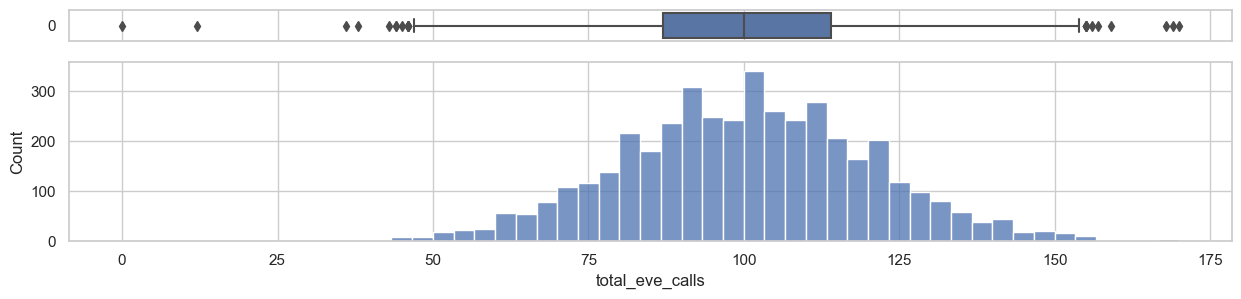

{'no': 100.5, 'yes': 99.0}


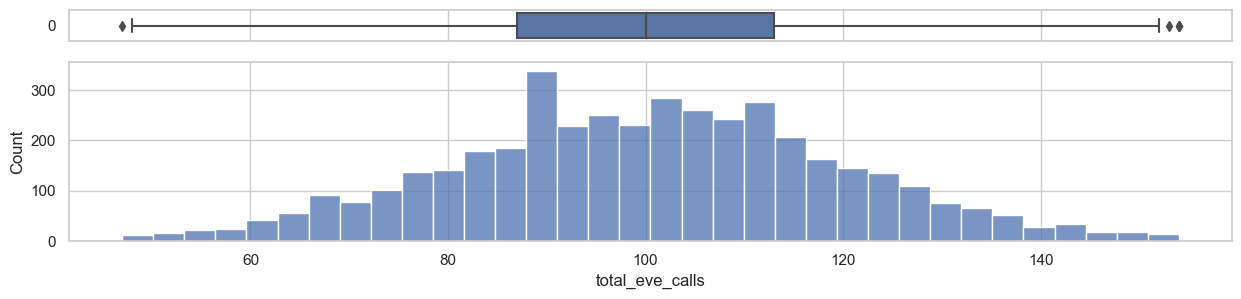

In [47]:
onefeature = "total_eve_calls" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 19
[(2, 5.26), (442, 3.59), (486, 5.01), (688, 3.73), (712, 4.5), (744, 3.61), (748, 5.17), (885, 4.98), (997, 4.76), (1036, 4.09), (1129, 5.1), (1661, 4.18), (2482, 0.0), (2859, 1.9), (3213, 4.96), (3377, 3.21), (3384, 3.54), (3707, 4.02), (3717, 4.52)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 15
[(4, 29.62), (6, 29.89), (439, 28.65), (479, 29.52), (1075, 28.56), (1838, 28.89), (1986, 28.53), (2602, 29.01), (3345, 29.24), (3524, 29.7), (3854, 29.32), (3873, 29.93), (3924, 29.33), (4157, 30.54), (4244, 28.93)]
['no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes']


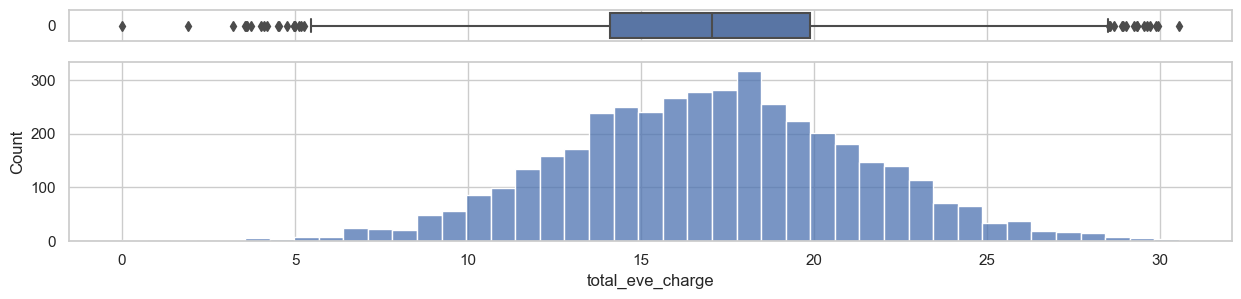

{'no': 16.95, 'yes': 17.84}


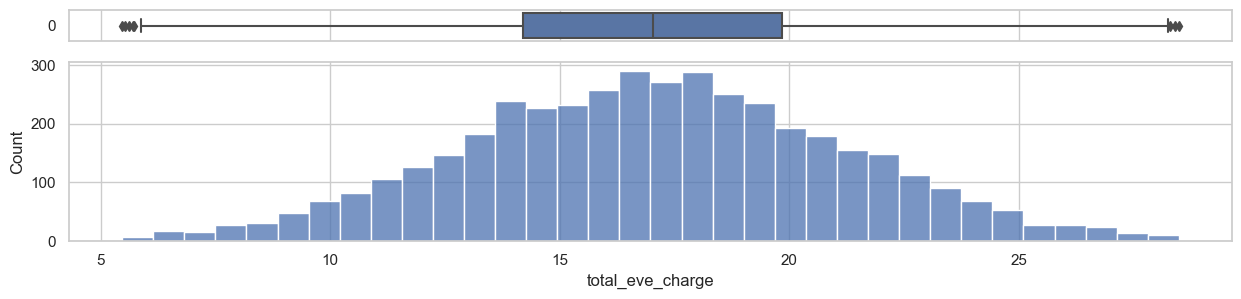

In [48]:
onefeature = "total_eve_charge" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 21
[(97, 57.5), (699, 65.8), (739, 45.0), (832, 63.3), (838, 54.5), (897, 50.1), (934, 43.7), (1060, 23.2), (1110, 63.6), (1276, 65.7), (1997, 56.6), (2025, 54.0), (2086, 64.2), (2334, 50.1), (2557, 53.3), (2756, 47.4), (3219, 46.7), (3572, 65.2), (3713, 59.5), (4001, 0.0), (4106, 60.3)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no']
Upper Outlier Data : 16
[(369, 349.2), (723, 345.8), (767, 342.8), (1007, 349.7), (1041, 352.5), (1114, 381.9), (1222, 377.5), (1973, 367.7), (2214, 344.3), (2257, 395.0), (2333, 350.2), (2590, 352.2), (2631, 364.9), (2865, 381.6), (3296, 359.9), (4015, 355.1)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no']


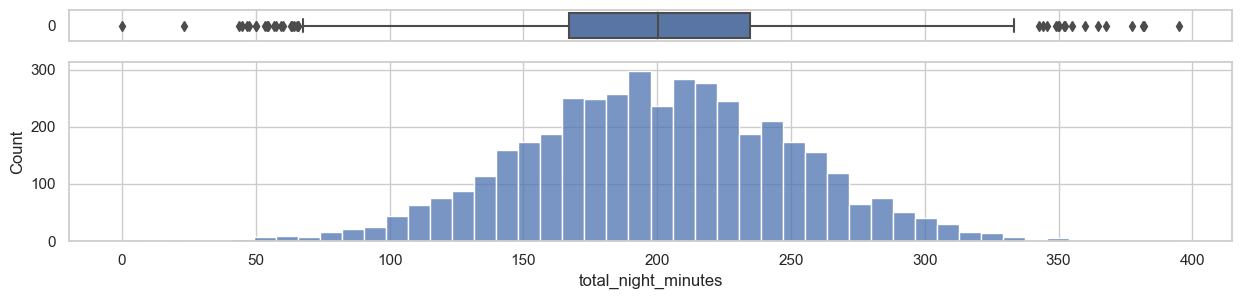

{'no': 199.4, 'yes': 206.3}


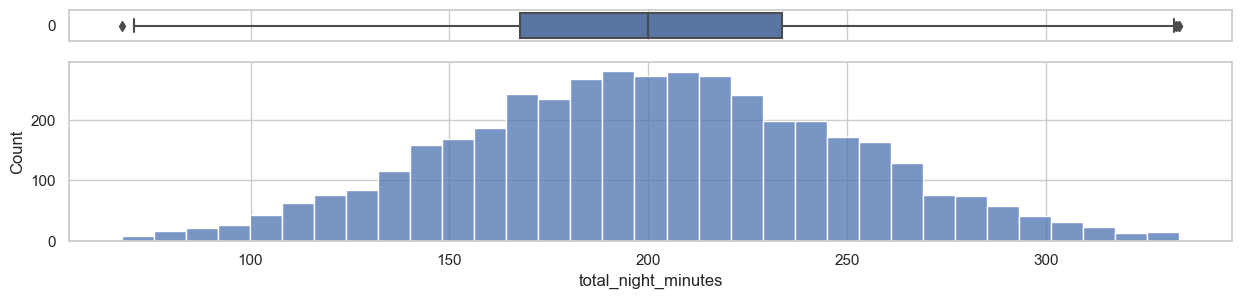

In [49]:
onefeature = "total_night_minutes" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 13
[(271, 42), (279, 44), (328, 42), (2253, 33), (2458, 38), (2529, 36), (2989, 40), (3457, 42), (3462, 41), (3559, 38), (3716, 42), (3859, 43), (4001, 0)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no']
Upper Outlier Data : 20
[(409, 175), (485, 154), (753, 158), (930, 155), (1005, 157), (1094, 157), (2313, 155), (2318, 156), (2689, 156), (2721, 164), (3018, 161), (3185, 159), (3213, 160), (3292, 170), (3316, 158), (3449, 154), (3520, 159), (3680, 155), (3820, 165), (3877, 155)]
['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes']


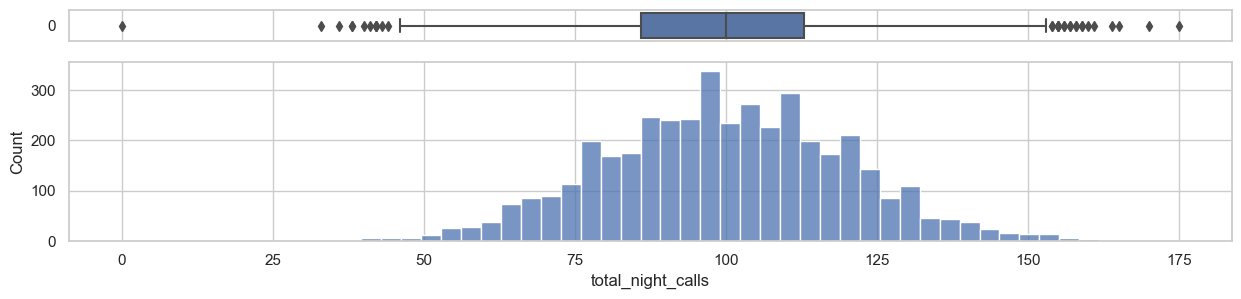

{'no': 100.0, 'yes': 99.0}


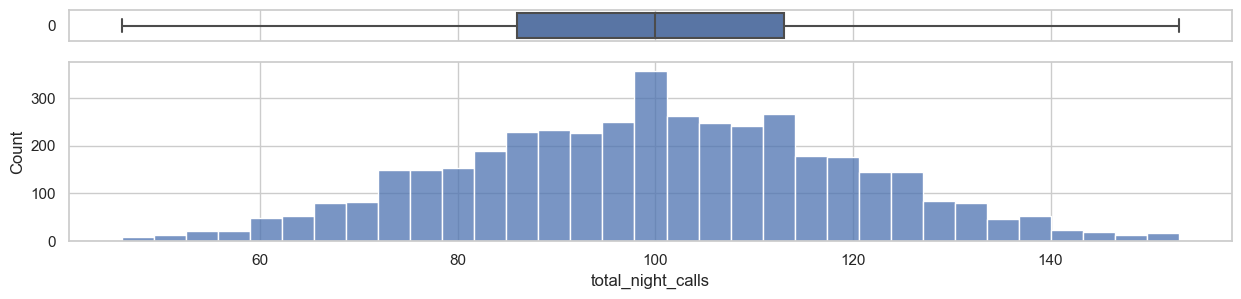

In [50]:
onefeature = "total_night_calls" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 21
[(97, 2.59), (699, 2.96), (739, 2.03), (832, 2.85), (838, 2.45), (897, 2.25), (934, 1.97), (1060, 1.04), (1110, 2.86), (1276, 2.96), (1997, 2.55), (2025, 2.43), (2086, 2.89), (2334, 2.25), (2557, 2.4), (2756, 2.13), (3219, 2.1), (3572, 2.93), (3713, 2.68), (4001, 0.0), (4106, 2.71)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no']
Upper Outlier Data : 16
[(369, 15.71), (723, 15.56), (767, 15.43), (1007, 15.74), (1041, 15.86), (1114, 17.19), (1222, 16.99), (1973, 16.55), (2214, 15.49), (2257, 17.77), (2333, 15.76), (2590, 15.85), (2631, 16.42), (2865, 17.17), (3296, 16.2), (4015, 15.98)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no']


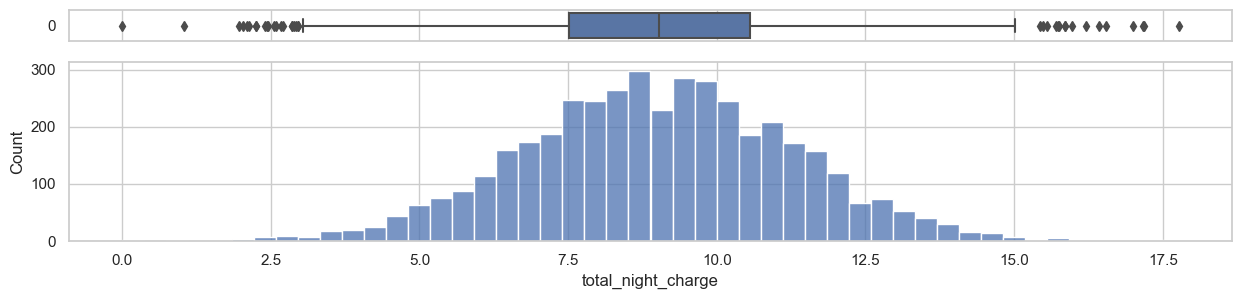

{'no': 8.97, 'yes': 9.28}


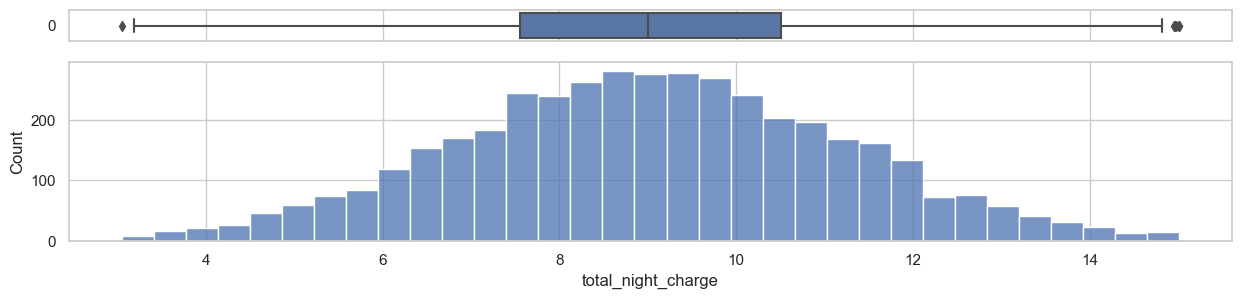

In [51]:
onefeature = "total_night_charge" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 38
[(146, 0.0), (185, 2.7), (285, 0.0), (405, 0.0), (593, 0.0), (636, 1.3), (735, 0.0), (863, 0.0), (903, 0.0), (920, 2.2), (1186, 0.0), (1317, 0.0), (1666, 2.0), (1854, 2.9), (1920, 2.6), (1993, 0.0), (2007, 0.0), (2136, 0.0), (2263, 1.1), (2316, 0.0), (2461, 0.0), (2470, 0.0), (2483, 2.1), (2555, 2.9), (2679, 2.1), (2725, 2.4), (2743, 2.5), (2780, 0.0), (2792, 0.0), (2886, 0.0), (3090, 0.0), (3288, 0.4), (3476, 2.2), (3703, 0.0), (3768, 0.0), (4192, 0.0), (4204, 1.1), (4209, 2.0)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']
Upper Outlier Data : 24
[(96, 20.0), (261, 18.9), (304, 18.0), (414, 17.5), (443, 18.2), (1057, 18.0), (1203, 17.9), (1323, 17.3), (1392, 17.3), (1530, 18.4), (1895, 17.6), (1904, 17.3), (2015, 18.2), (2154, 18.0), (2384, 18.3), (2607, 17.5), (2807, 17.8), (330

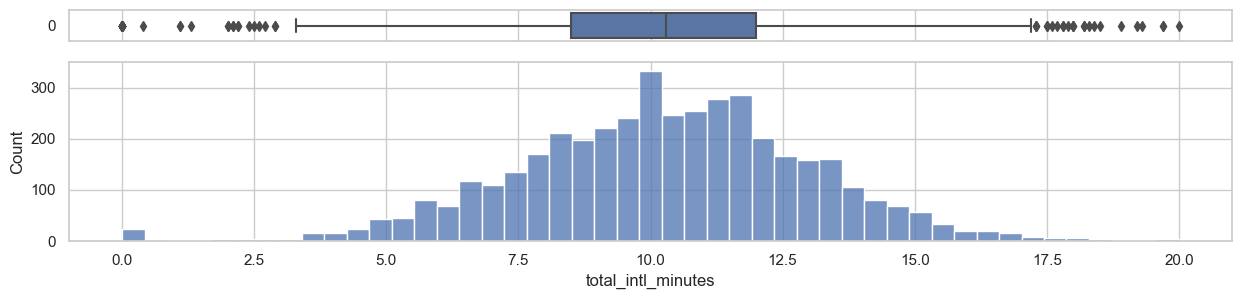

{'no': 10.3, 'yes': 10.5}


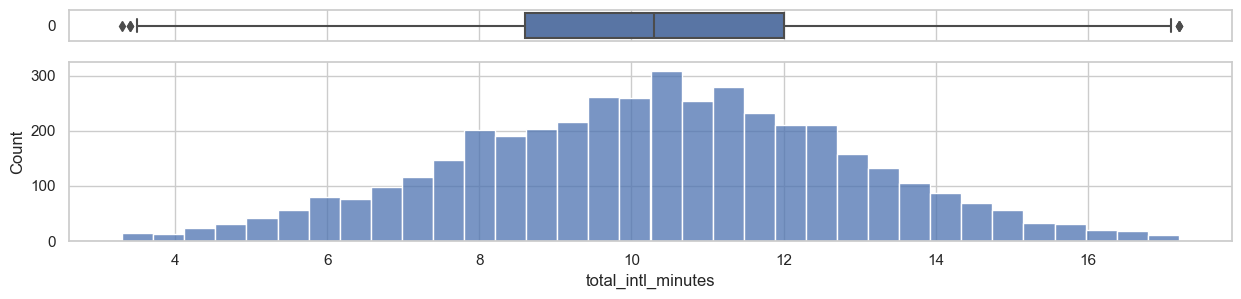

In [52]:
onefeature = "total_intl_minutes" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 100
[(18, 19), (32, 15), (126, 11), (149, 12), (152, 13), (176, 11), (179, 12), (205, 11), (225, 13), (274, 12), (289, 11), (312, 18), (347, 11), (393, 12), (400, 13), (416, 12), (426, 12), (487, 11), (527, 15), (533, 13), (560, 15), (581, 11), (630, 14), (701, 13), (705, 11), (724, 13), (739, 12), (770, 14), (800, 15), (824, 18), (857, 12), (914, 13), (1120, 11), (1127, 12), (1148, 14), (1178, 15), (1202, 12), (1320, 16), (1334, 11), (1398, 11), (1514, 11), (1545, 11), (1596, 15), (1661, 11), (1696, 14), (1710, 11), (1834, 11), (1932, 13), (2175, 11), (2186, 11), (2222, 16), (2292, 13), (2309, 11), (2348, 13), (2394, 11), (2402, 15), (2440, 11), (2481, 12), (2496, 13), (2503, 18), (2558, 12), (2599, 12), (2621, 11), (2633, 13), (2652, 11), (2717, 13), (2739, 14), (2793, 20), (2810, 17), (2898, 12), (2975, 13), (2994, 16), (3032, 11), (3068, 16), (3091, 16), (3147, 11), (3214, 11), (3235, 12), (3246, 15), (3247, 16), (3362, 12), (3379, 

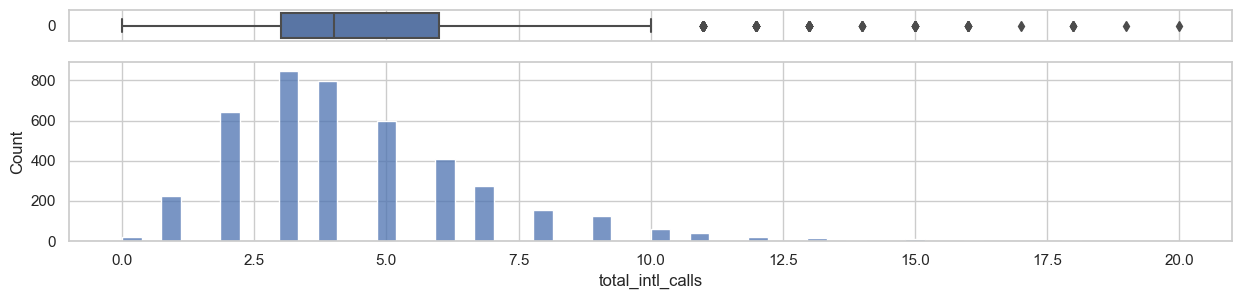

{'no': 4.0, 'yes': 4.0}


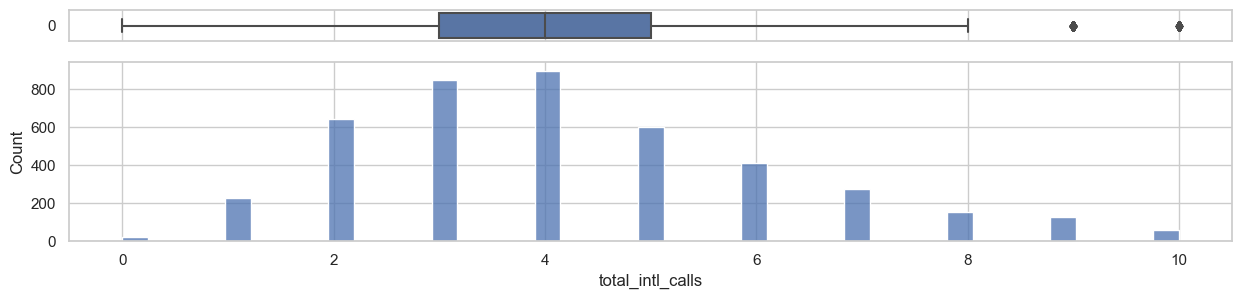

In [53]:
onefeature = "total_intl_calls" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 38
[(146, 0.0), (185, 0.73), (285, 0.0), (405, 0.0), (593, 0.0), (636, 0.35), (735, 0.0), (863, 0.0), (903, 0.0), (920, 0.59), (1186, 0.0), (1317, 0.0), (1666, 0.54), (1854, 0.78), (1920, 0.7), (1993, 0.0), (2007, 0.0), (2136, 0.0), (2263, 0.3), (2316, 0.0), (2461, 0.0), (2470, 0.0), (2483, 0.57), (2555, 0.78), (2679, 0.57), (2725, 0.65), (2743, 0.68), (2780, 0.0), (2792, 0.0), (2886, 0.0), (3090, 0.0), (3288, 0.11), (3476, 0.59), (3703, 0.0), (3768, 0.0), (4192, 0.0), (4204, 0.3), (4209, 0.54)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']
Upper Outlier Data : 24
[(96, 5.4), (261, 5.1), (304, 4.86), (414, 4.73), (443, 4.91), (1057, 4.86), (1203, 4.83), (1323, 4.67), (1392, 4.67), (1530, 4.97), (1895, 4.75), (1904, 4.67), (2015, 4.91), (2154, 4.86), (2384, 4.94), (2607, 4.73), (2807, 

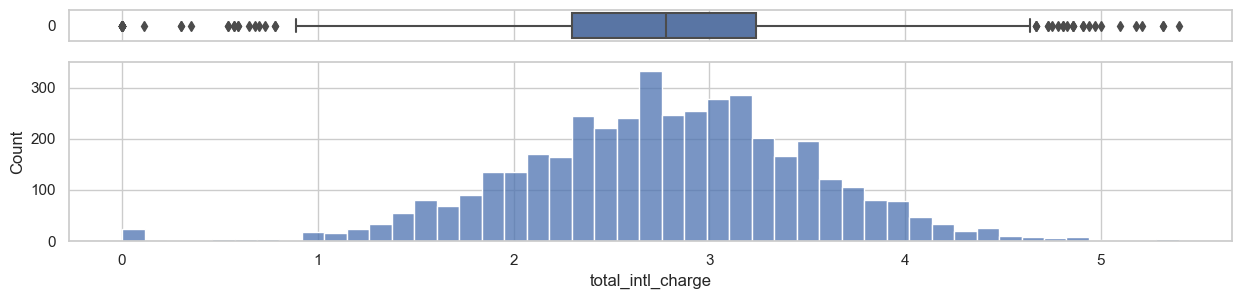

{'no': 2.78, 'yes': 2.84}


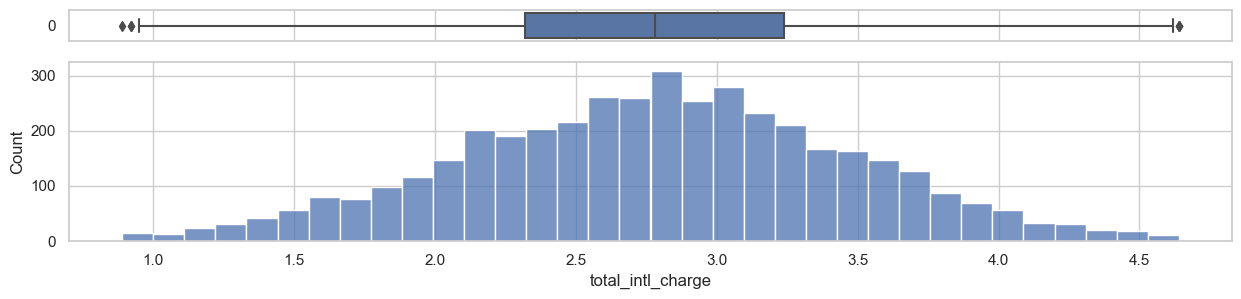

In [54]:
onefeature = "total_intl_charge" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 45
[(277, 7), (433, 7), (449, 9), (577, 6), (602, 6), (650, 6), (754, 7), (759, 6), (816, 6), (1072, 6), (1192, 6), (1268, 8), (1380, 6), (1427, 7), (1544, 7), (1575, 7), (1619, 8), (1625, 6), (1889, 6), (1979, 6), (2023, 9), (2030, 6), (2064, 6), (2357, 6), (2500, 7), (2506, 6), (2523, 7), (2559, 6), (2608, 6), (2636, 7), (2704, 6), (3030, 6), (3038, 6), (3254, 6), (3462, 7), (3648, 7), (3656, 7), (3734, 7), (3847, 6), (3931, 6), (3970, 6), (3986, 6), (4061, 6), (4072, 6), (4180, 6)]
['yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes']


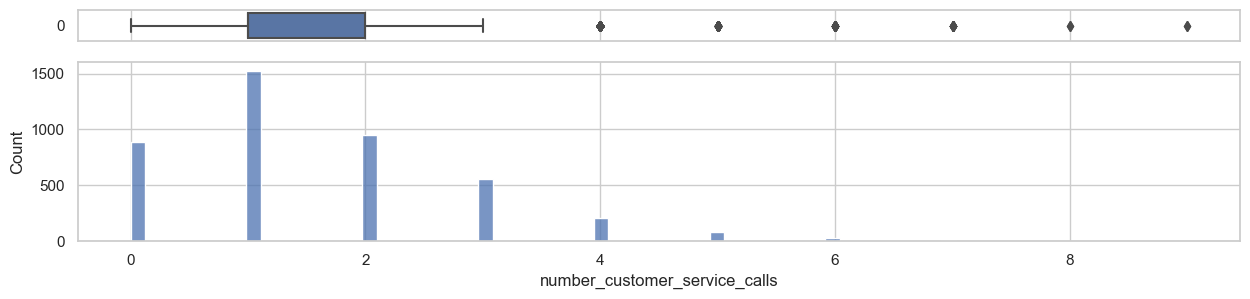

In [55]:
onefeature = "number_customer_service_calls" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 3)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)

In [56]:
data[onefeature].value_counts()

1    1524
2     947
0     886
3     558
4     209
5      81
6      28
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64

In [57]:
hash_state = ce.HashingEncoder(cols = 'state')
train = hash_state.fit_transform(train)
train.head()

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  account_length  \
0      0      0      0      0      1      0      0      0             107   
1      0      1      0      0      0      0      0      0             137   
2      0      0      0      0      1      0      0      0              84   
3      0      0      0      0      1      0      0      0              75   
4      0      0      0      0      1      0      0      0             121   

       area_code international_plan voice_mail_plan  number_vmail_messages  \
0  area_code_415                 no             yes                     26   
1  area_code_415                 no              no                      0   
2  area_code_408                yes              no                      0   
3  area_code_415                yes              no                      0   
4  area_code_510                 no             yes                     24   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              161.6              123             27.47              195.5   
1              243.4              114             41.38              121.2   
2              299.4               71             50.90              199.4   
3              166.7              113             28.34              148.3   
4              218.2               88             37.09              199.4   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0            103.0             16.62                254.4                103   
1            110.0             10.30                162.6                104   
2             88.0             16.95                196.9                 89   
3            122.0             12.61                186.9                121   
4            108.0             16.95                212.6                118   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               11.45                13.7                 3   
1                7.32                12.2                 5   
2                8.86                 6.6                 7   
3                8.41                10.1                 3   
4                9.57                 7.5                 7   

   total_intl_charge  number_customer_service_calls churn  
0               3.70                              1    no  
1               3.29                              0    no  
2               1.78                              2    no  
3               2.73                              3    no  
4               2.03                              3    no

In [58]:
# replace no to 0 and yes to 1
train.international_plan.replace(['no','yes'],[0,1],inplace = True)
train.voice_mail_plan.replace(['no','yes'],[0,1],inplace=True)
train.churn.replace(['no','yes'],[0,1],inplace = True)
train.head()

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  account_length  \
0      0      0      0      0      1      0      0      0             107   
1      0      1      0      0      0      0      0      0             137   
2      0      0      0      0      1      0      0      0              84   
3      0      0      0      0      1      0      0      0              75   
4      0      0      0      0      1      0      0      0             121   

       area_code  international_plan  voice_mail_plan  number_vmail_messages  \
0  area_code_415                   0                1                     26   
1  area_code_415                   0                0                      0   
2  area_code_408                   1                0                      0   
3  area_code_415                   1                0                      0   
4  area_code_510                   0                1                     24   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              161.6              123             27.47              195.5   
1              243.4              114             41.38              121.2   
2              299.4               71             50.90              199.4   
3              166.7              113             28.34              148.3   
4              218.2               88             37.09              199.4   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0            103.0             16.62                254.4                103   
1            110.0             10.30                162.6                104   
2             88.0             16.95                196.9                 89   
3            122.0             12.61                186.9                121   
4            108.0             16.95                212.6                118   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               11.45                13.7                 3   
1                7.32                12.2                 5   
2                8.86                 6.6                 7   
3                8.41                10.1                 3   
4                9.57                 7.5                 7   

   total_intl_charge  number_customer_service_calls  churn  
0               3.70                              1      0  
1               3.29                              0      0  
2               1.78                              2      0  
3               2.73                              3      0  
4               2.03                              3      0

In [59]:
# converting the area_code to numerical variable using one-hot encoder
onehot_area = OneHotEncoder()
onehot_area.fit(train[['area_code']])

encoded_values = onehot_area.transform(train[['area_code']])
train[onehot_area.categories_[0]] = encoded_values.toarray()
train = train.drop('area_code', axis=1)

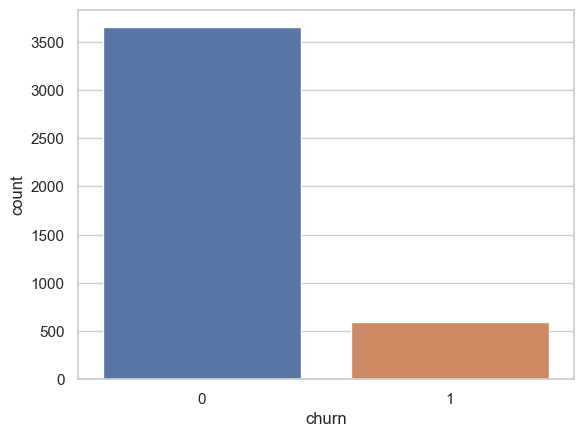

In [60]:
# Handling the Imbalanced dataset
# showing the imbalanced class
sns.countplot(x = 'churn', data = train)
plt.show()

In [61]:
x = train.drop('churn',axis=1).values
y = train.churn.values
# spliting the data into test and train
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [62]:
# after apply the upsampling technique the number of samples of both classes are same
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 2550
Before upsampling count of label 1 425
After upsampling count of label 0 2550
After upsampling count of label 1 2550


In [63]:
# creating the object of minmax scaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
# Building the model
# Support Vector Classification
svc = SVC(kernel='rbf', decision_function_shape='ovr')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8729411764705882
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1102
           1       0.72      0.10      0.18       173

    accuracy                           0.87      1275
   macro avg       0.80      0.55      0.56      1275
weighted avg       0.85      0.87      0.83      1275

Confusion Matrix
[[1095    7]
 [ 155   18]]
Cohen kappa score: 
0.15278917145200976


In [65]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.9584313725490196
Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1102
           1       0.97      0.72      0.82       173

    accuracy                           0.96      1275
   macro avg       0.96      0.86      0.90      1275
weighted avg       0.96      0.96      0.96      1275

Confusion Matrix
[[1098    4]
 [  49  124]]
Cohen kappa score: 
0.8009496681758064


In [66]:
# XGBClassifier
clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01, eval_metric='logloss')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.956078431372549
Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1102
           1       0.97      0.70      0.81       173

    accuracy                           0.96      1275
   macro avg       0.96      0.85      0.89      1275
weighted avg       0.96      0.96      0.95      1275

Confusion Matrix
[[1098    4]
 [  52  121]]
Cohen kappa score: 
0.7879417879417879
